# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch called "WP2_TD_Lect_5_YourName", based on the branch "zhiguo_dev" and switch to it.
- Copy the notebook WP2_DATA-DRIVEN FAULT DETECTION/support/WP2_TD_Lect_5 to WP2_DATA-DRIVEN FAULT DETECTION/TD_5/, and rename it to TD_Lect_5_YourName.ipynb
- After finishing this task, push your changes to your github repository.
- Submit a pull request to the "zhiguo_dev" branch.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



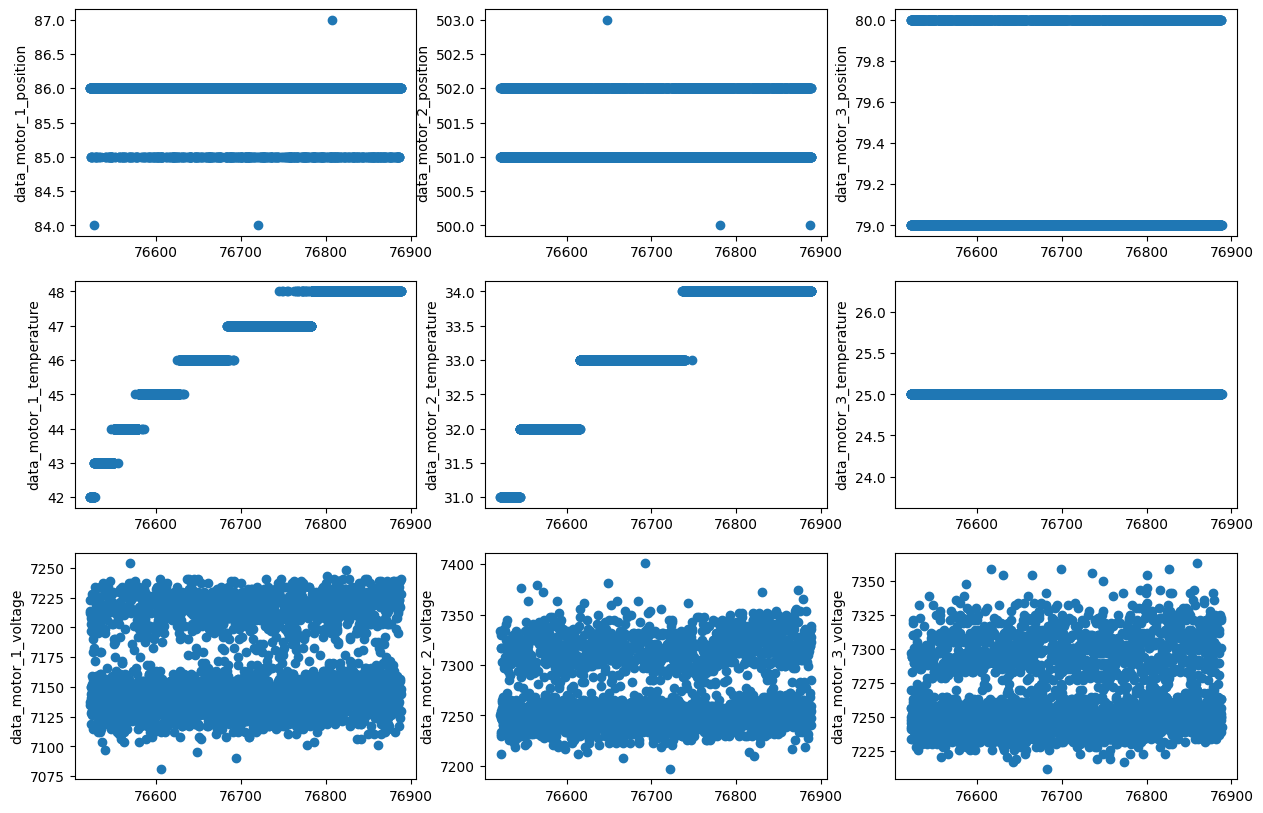

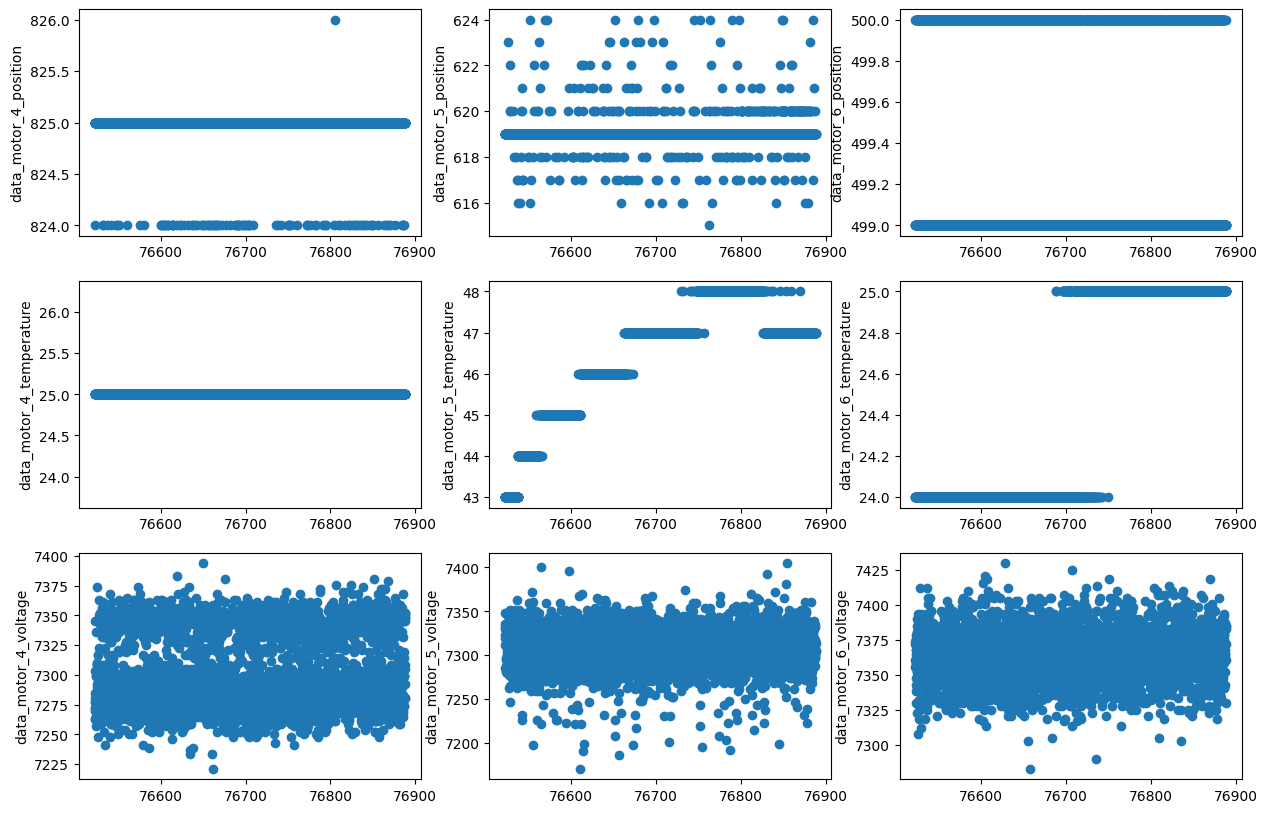

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



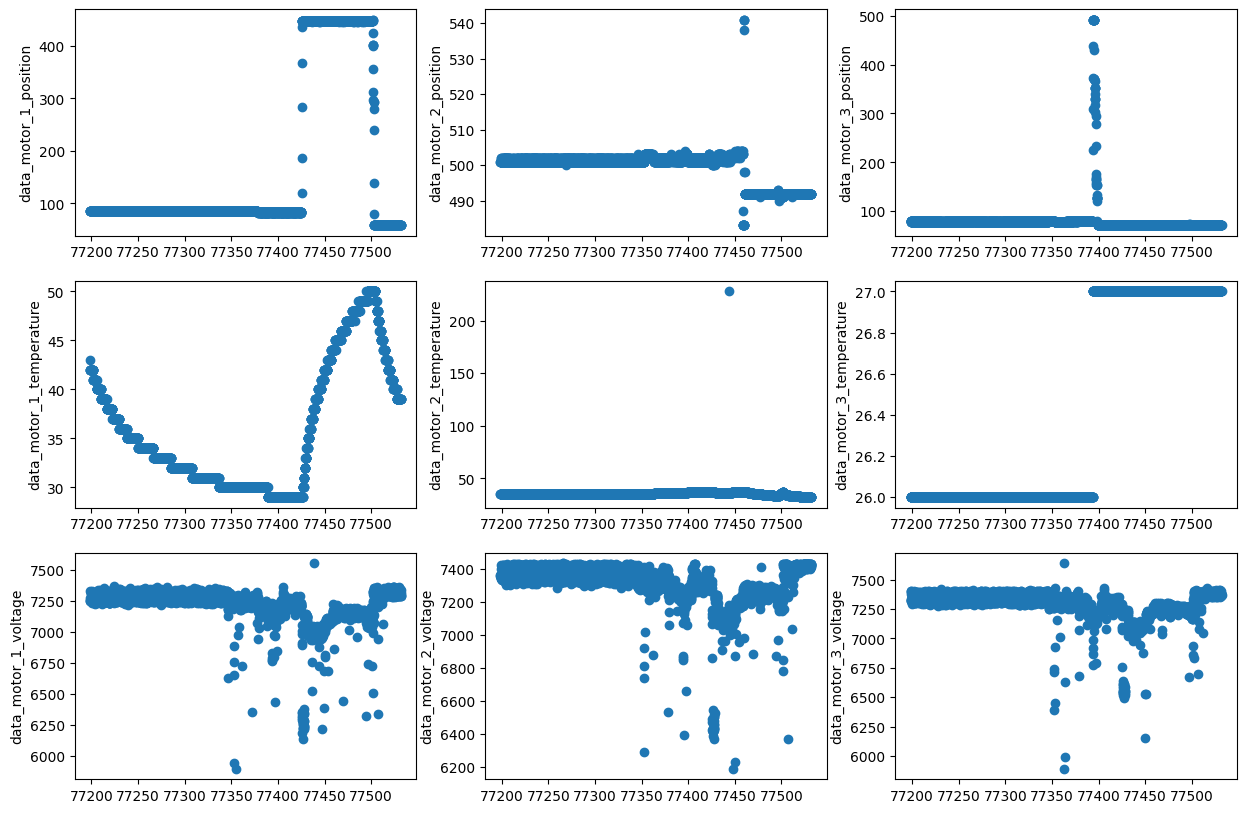

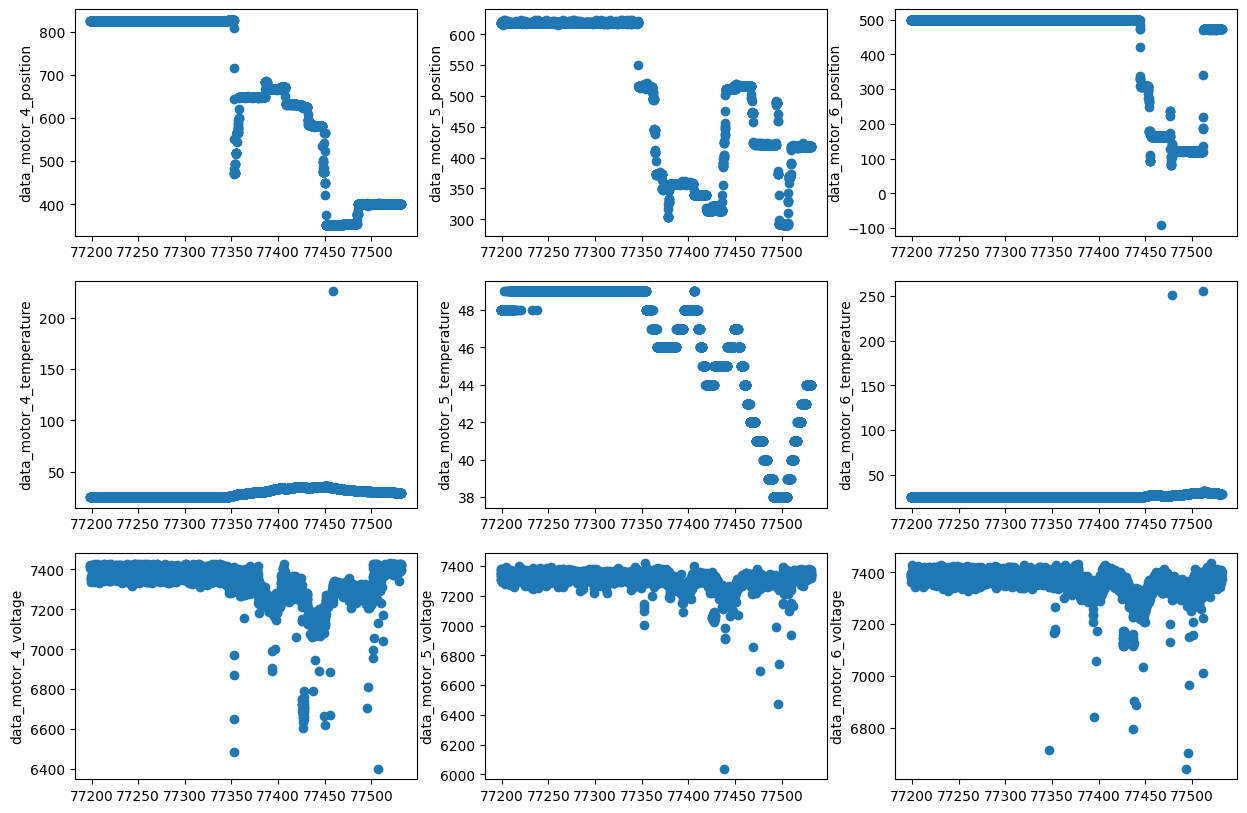

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



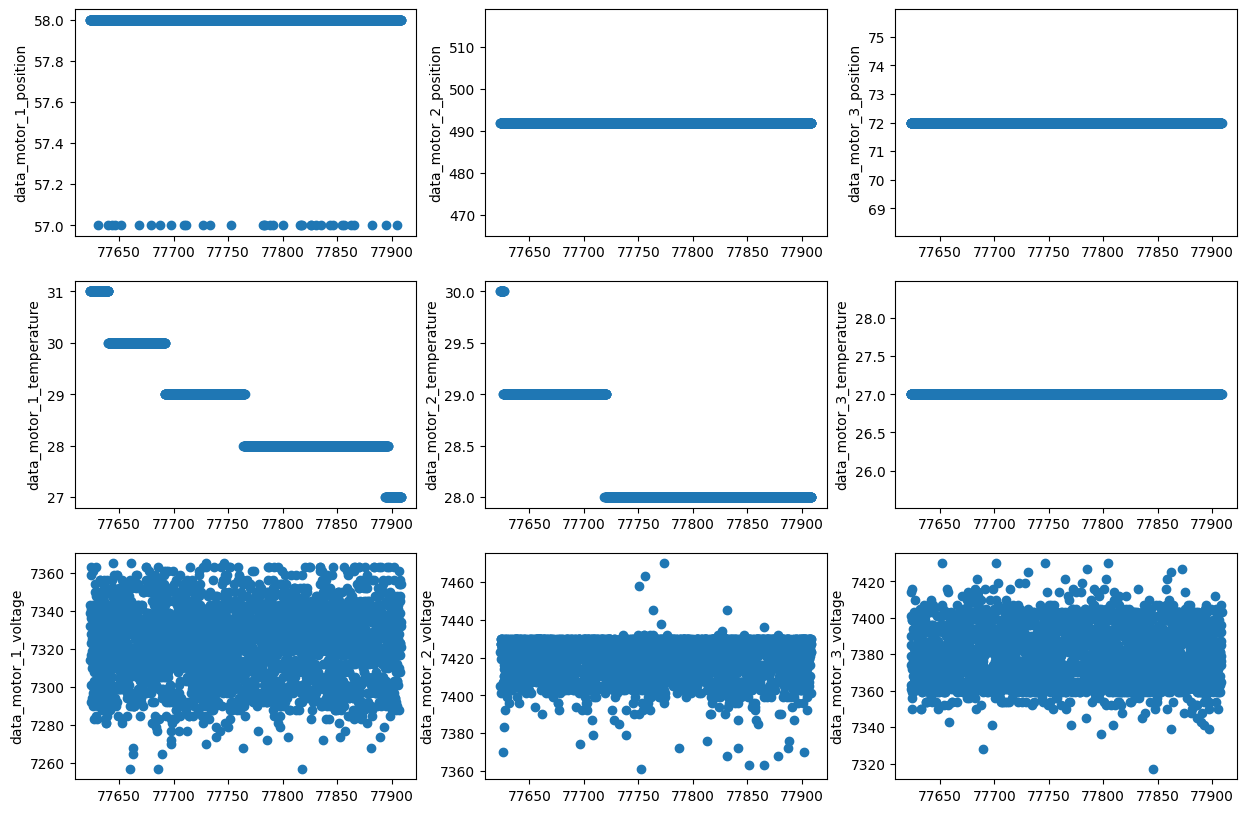

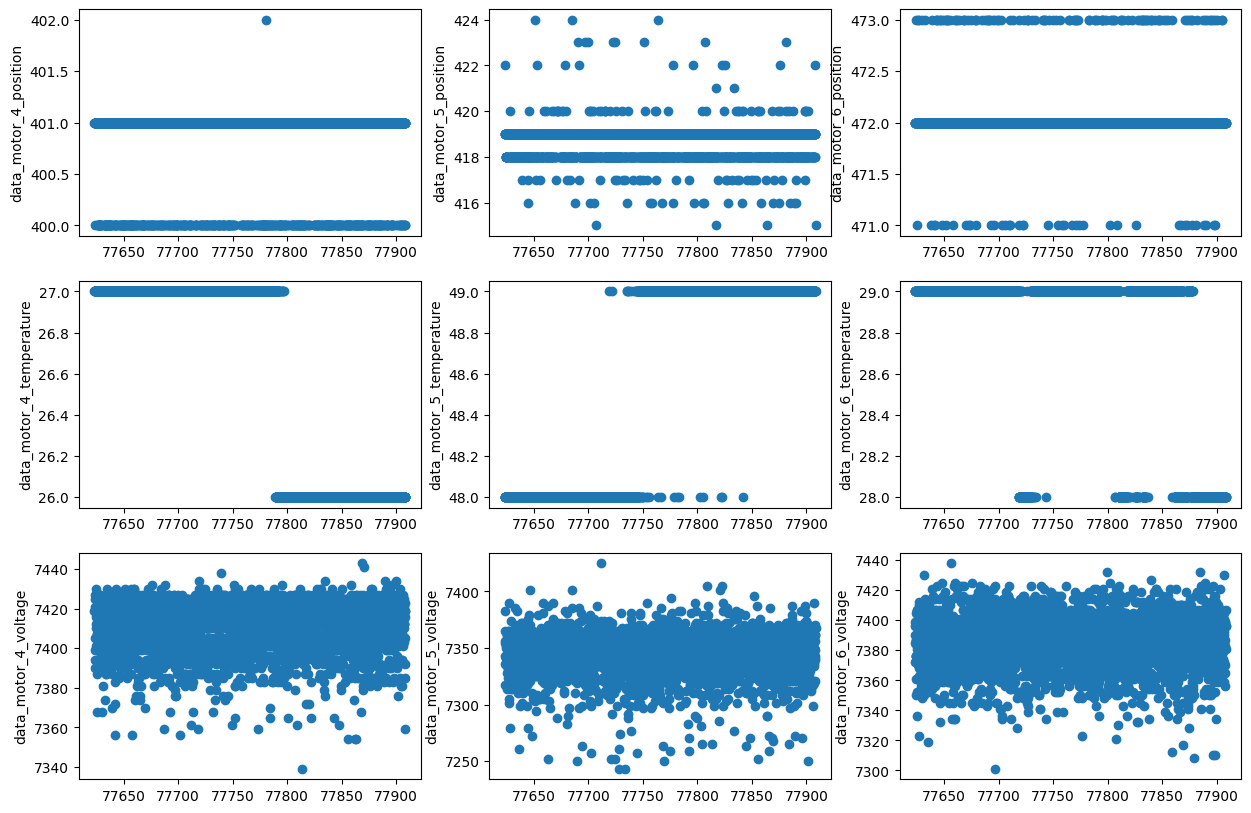

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



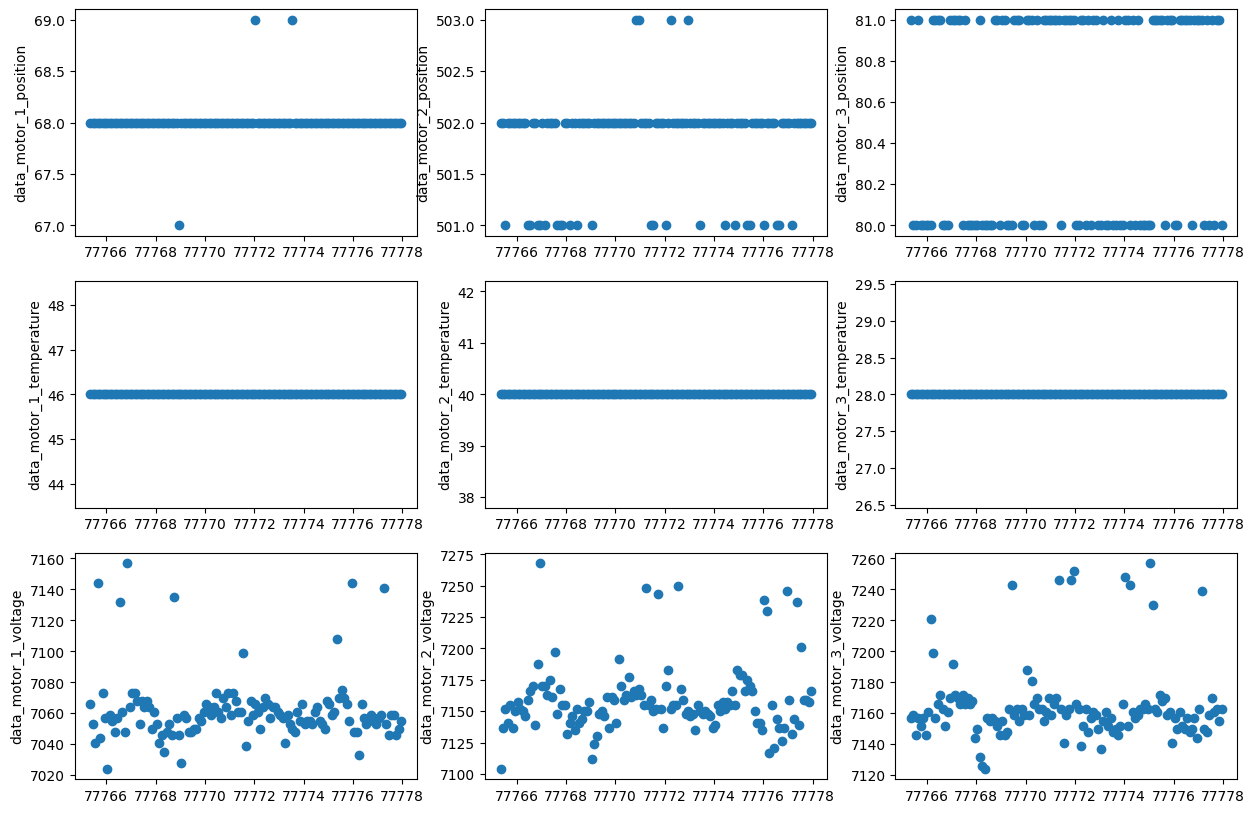

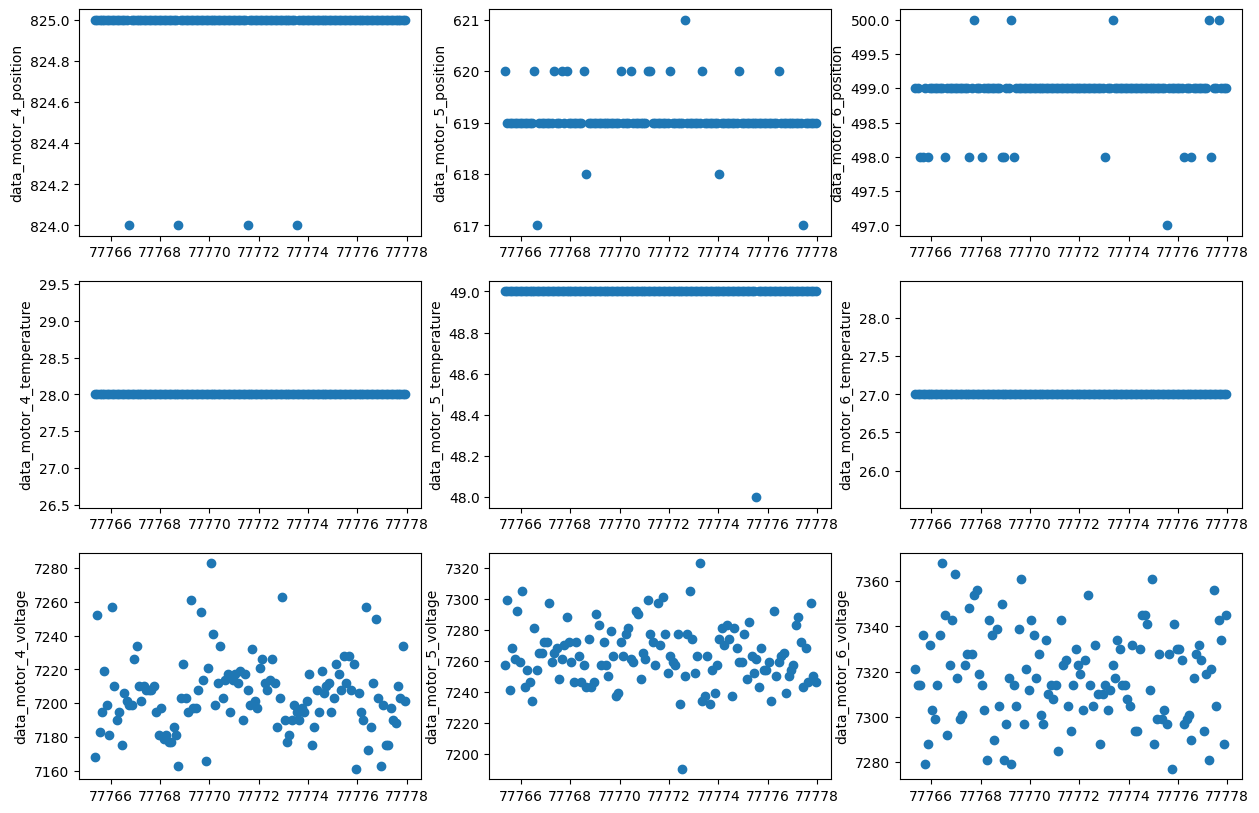

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



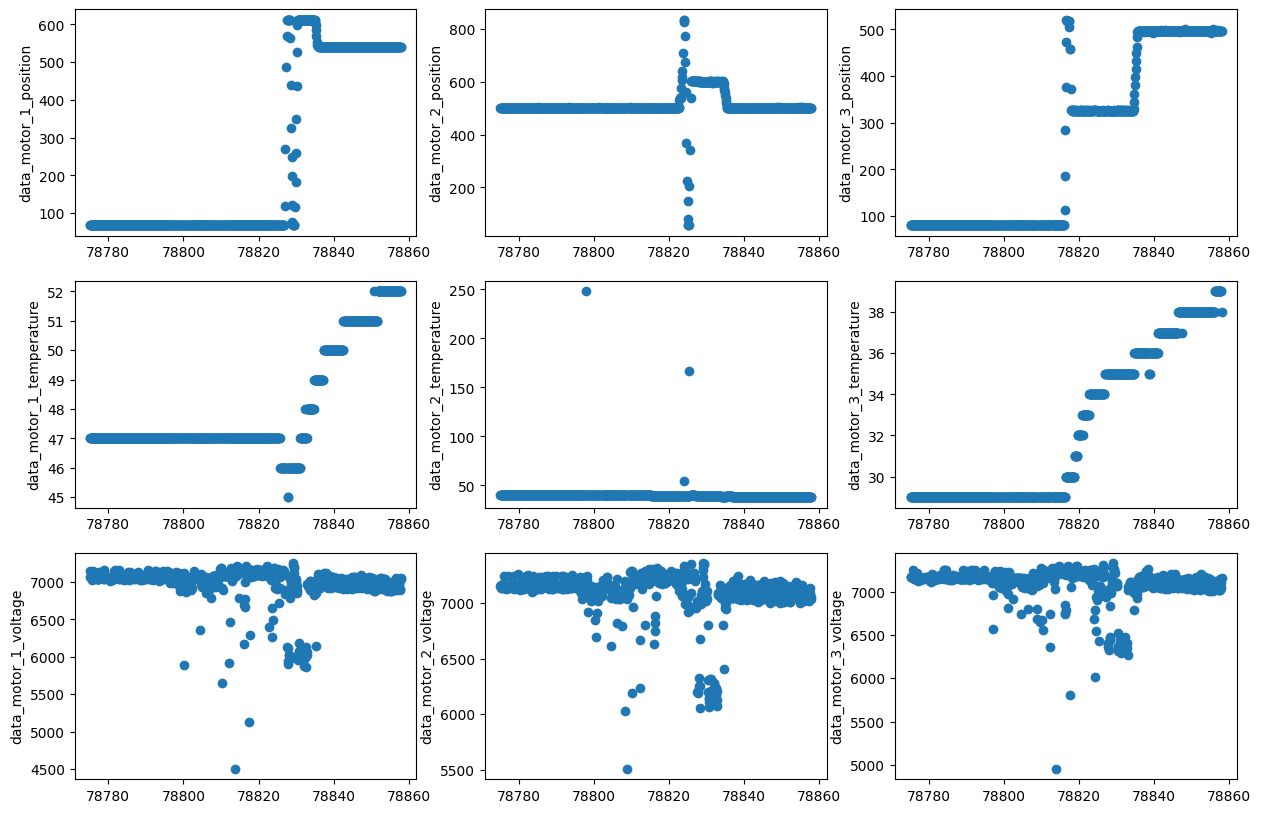

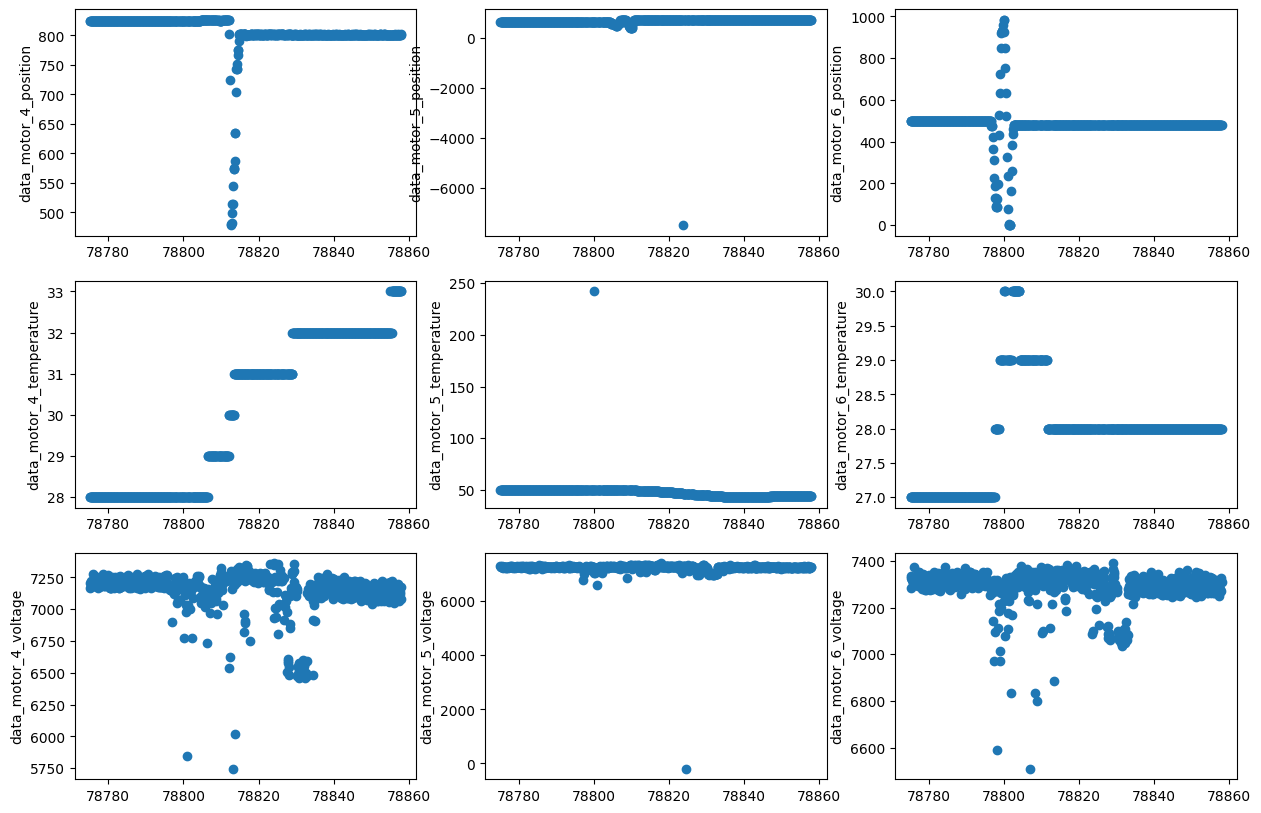

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



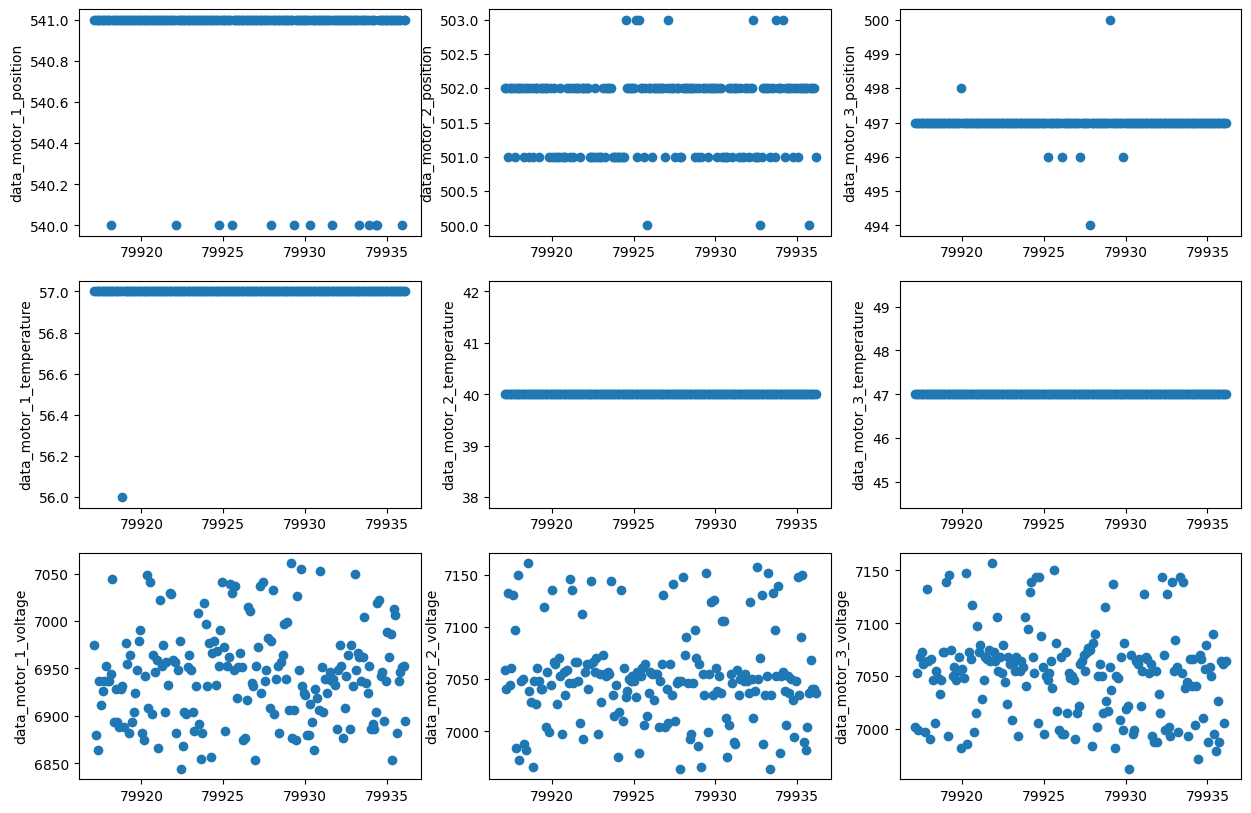

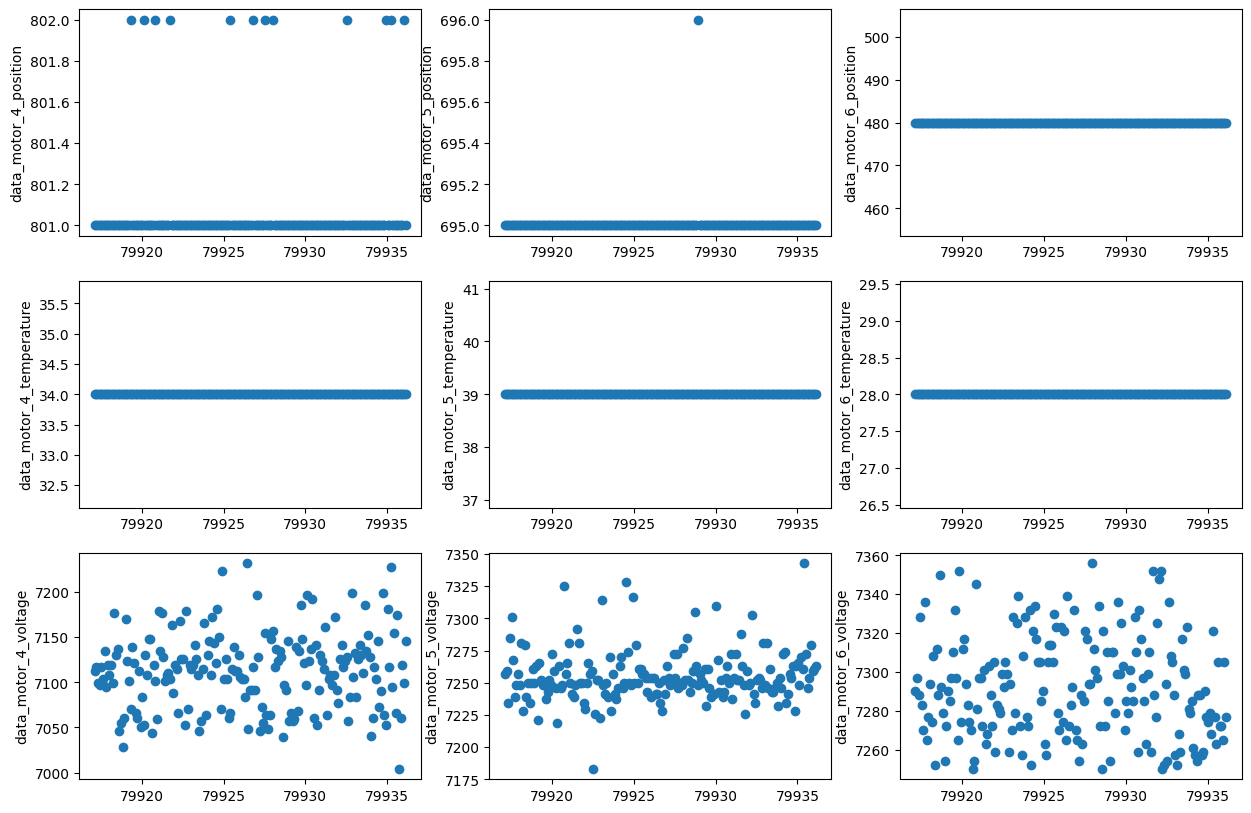

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



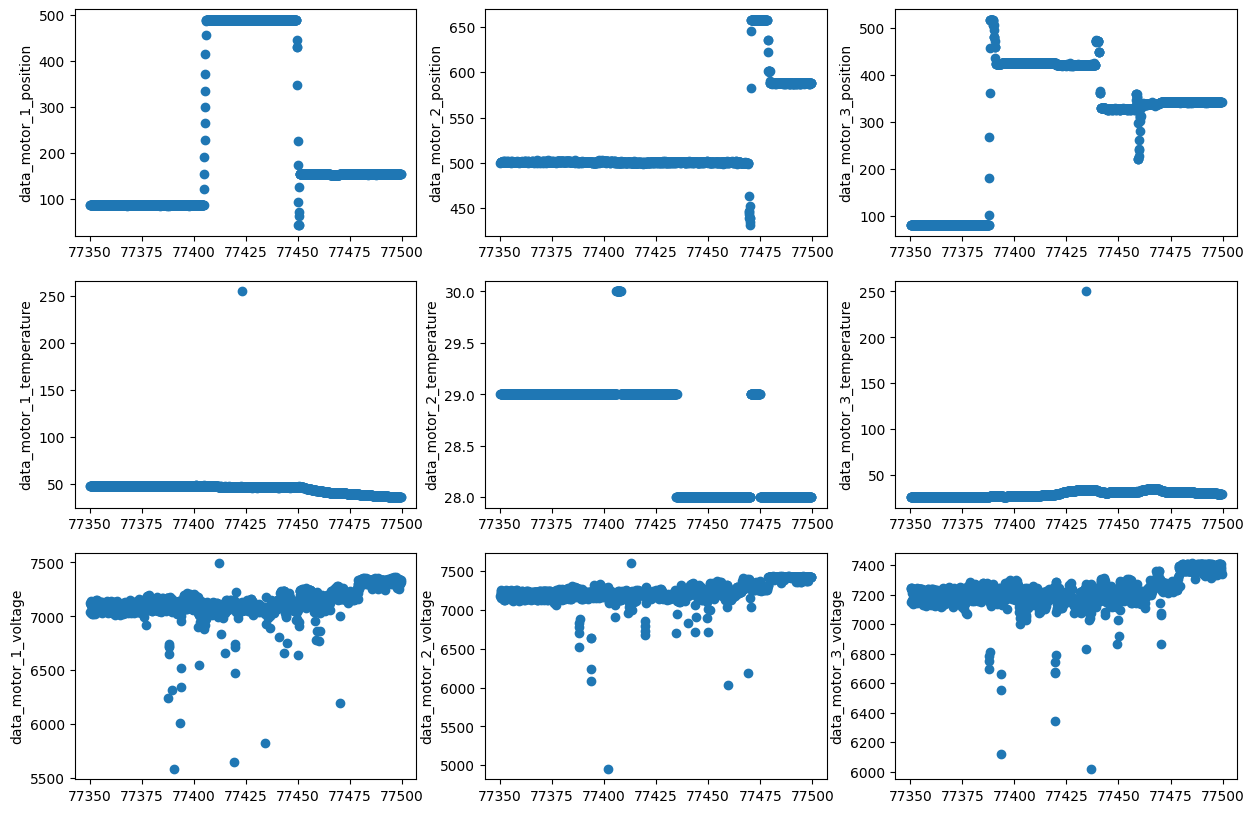

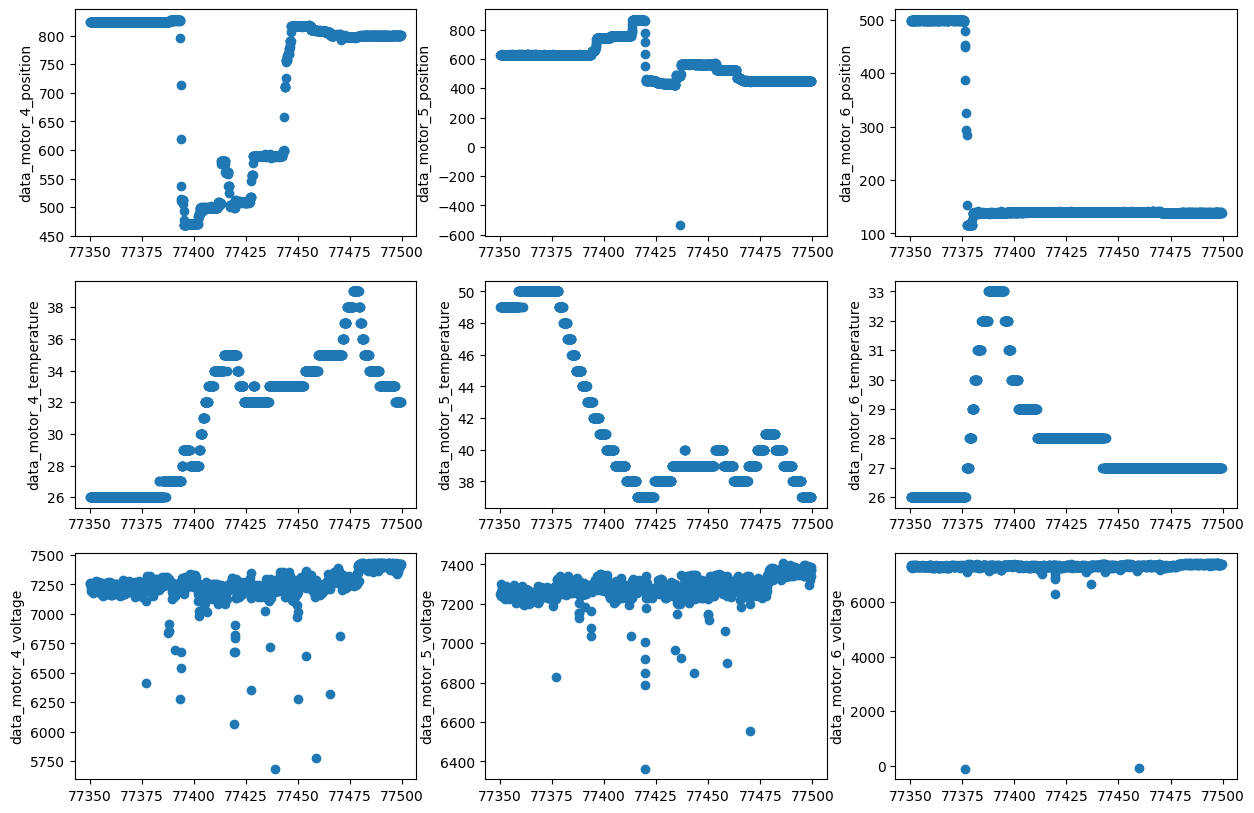

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



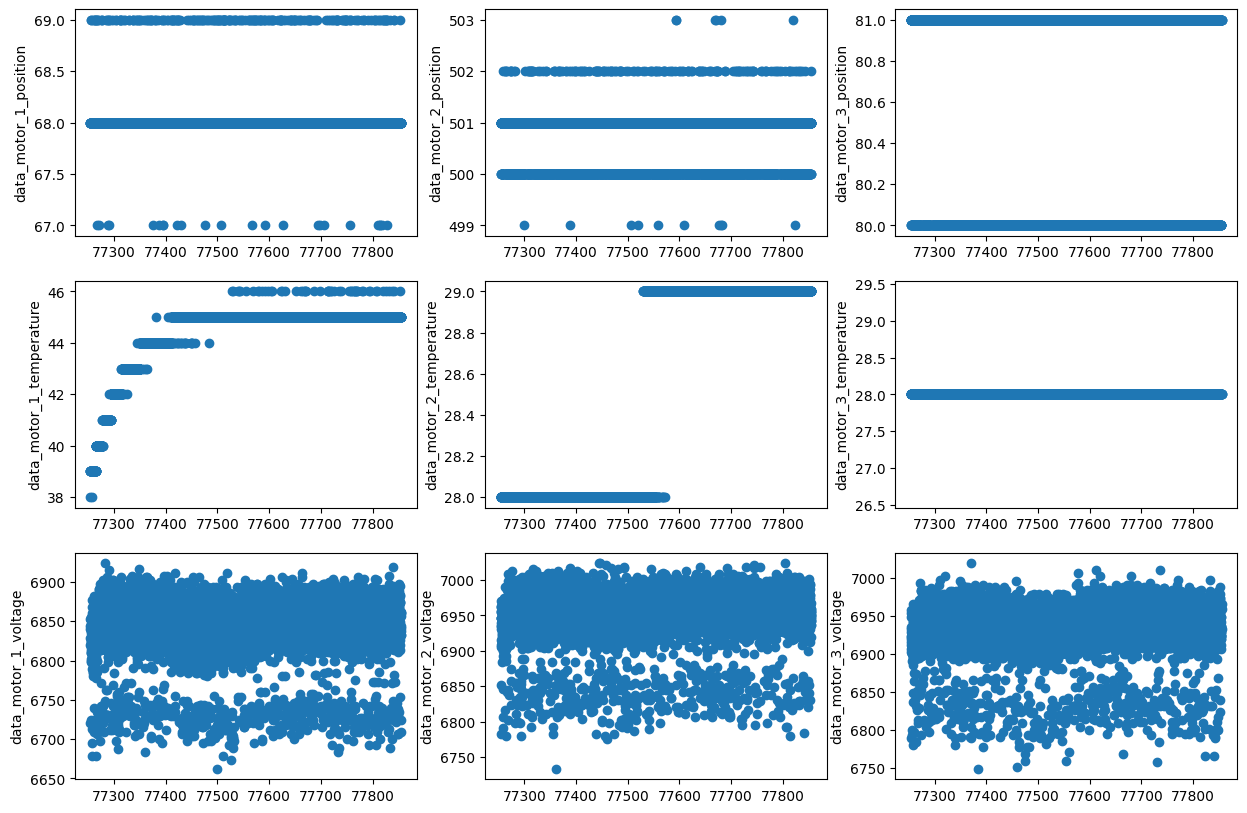

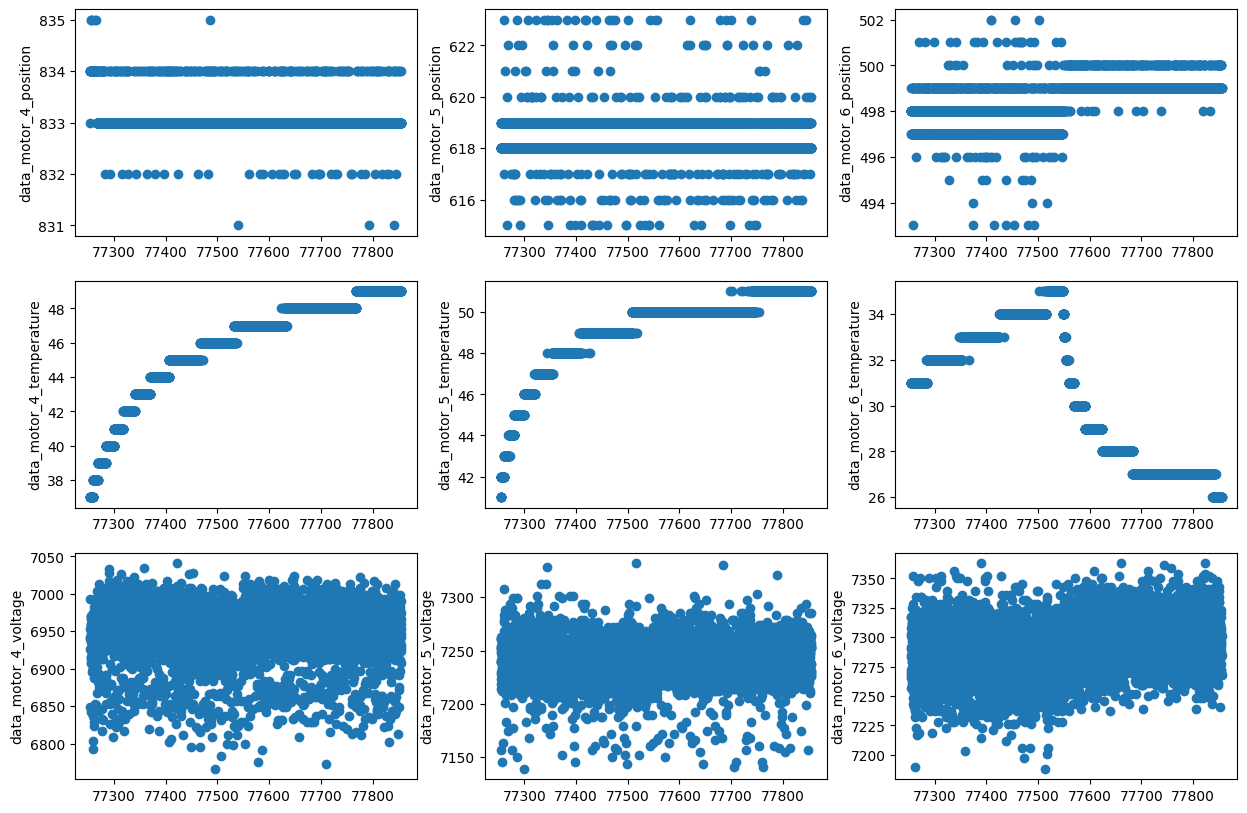

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



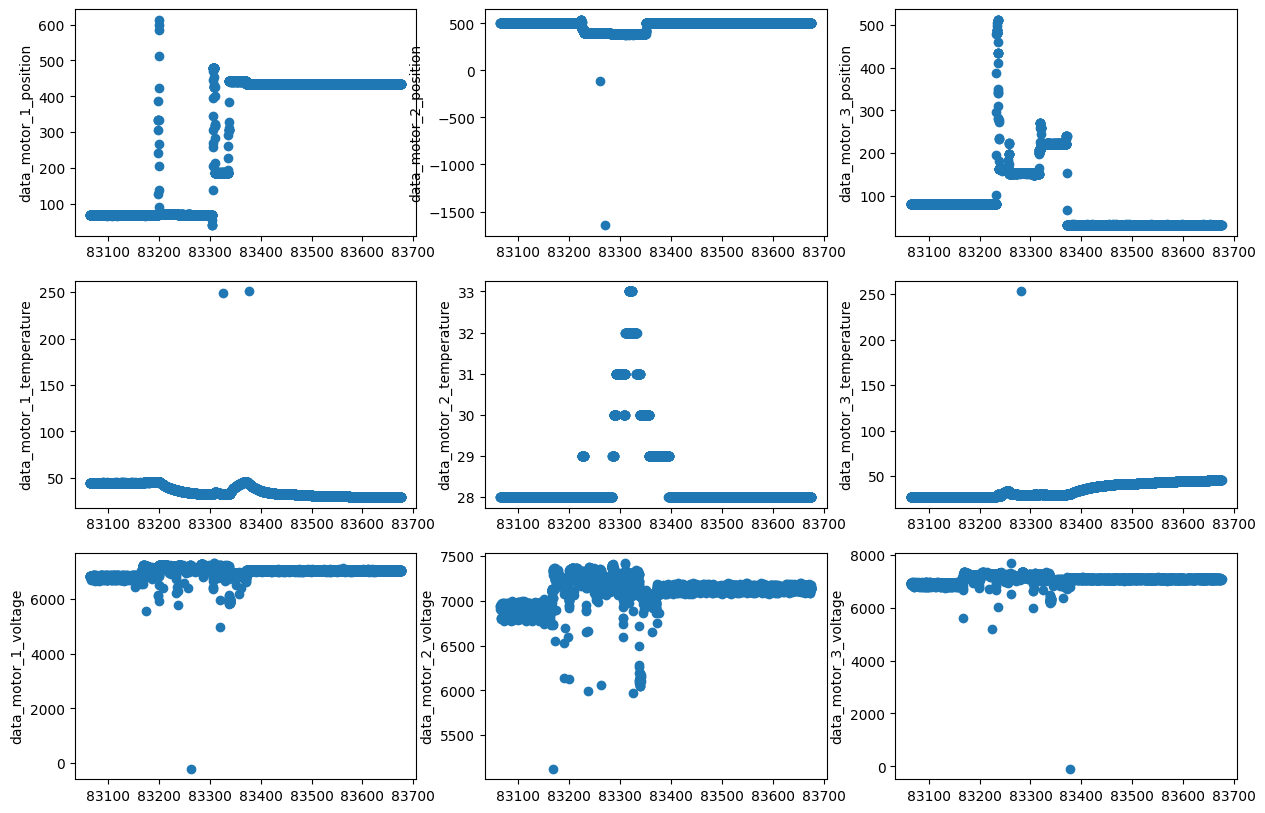

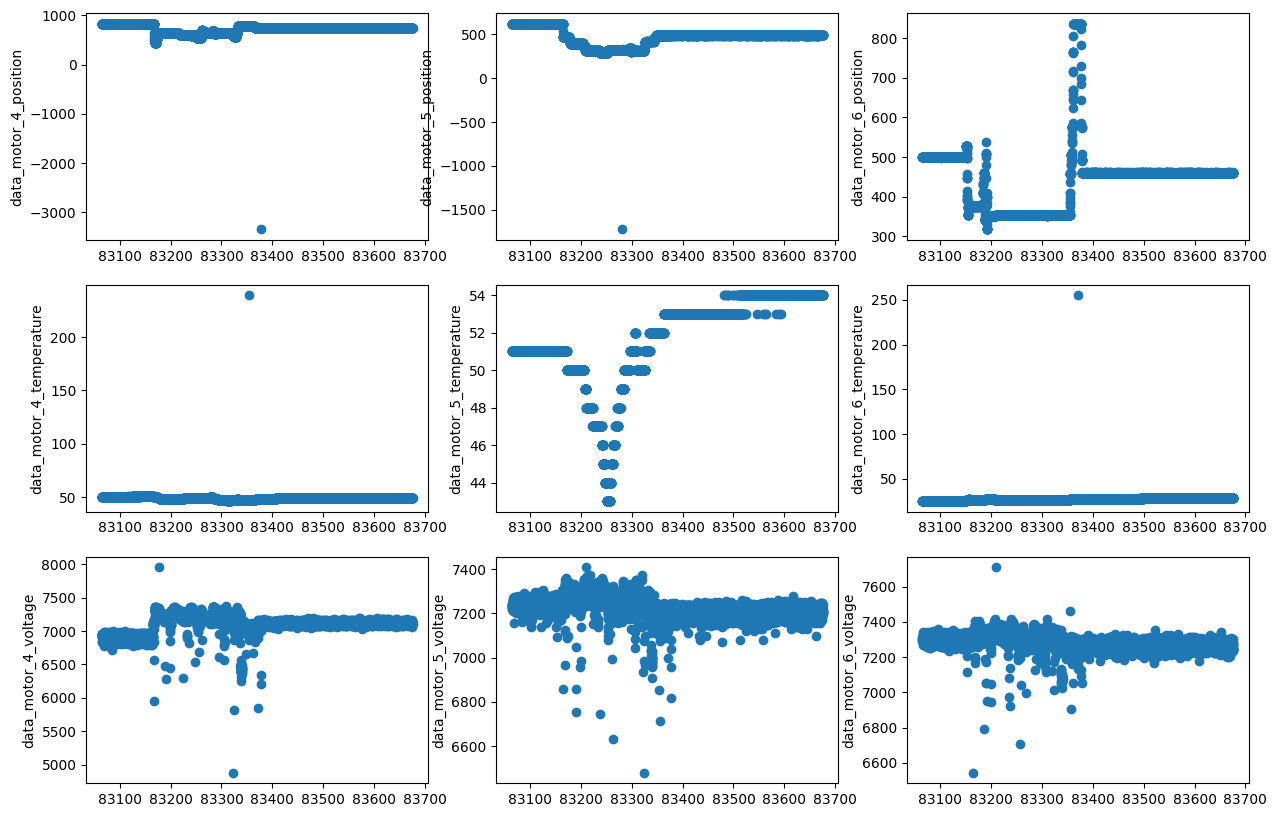

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



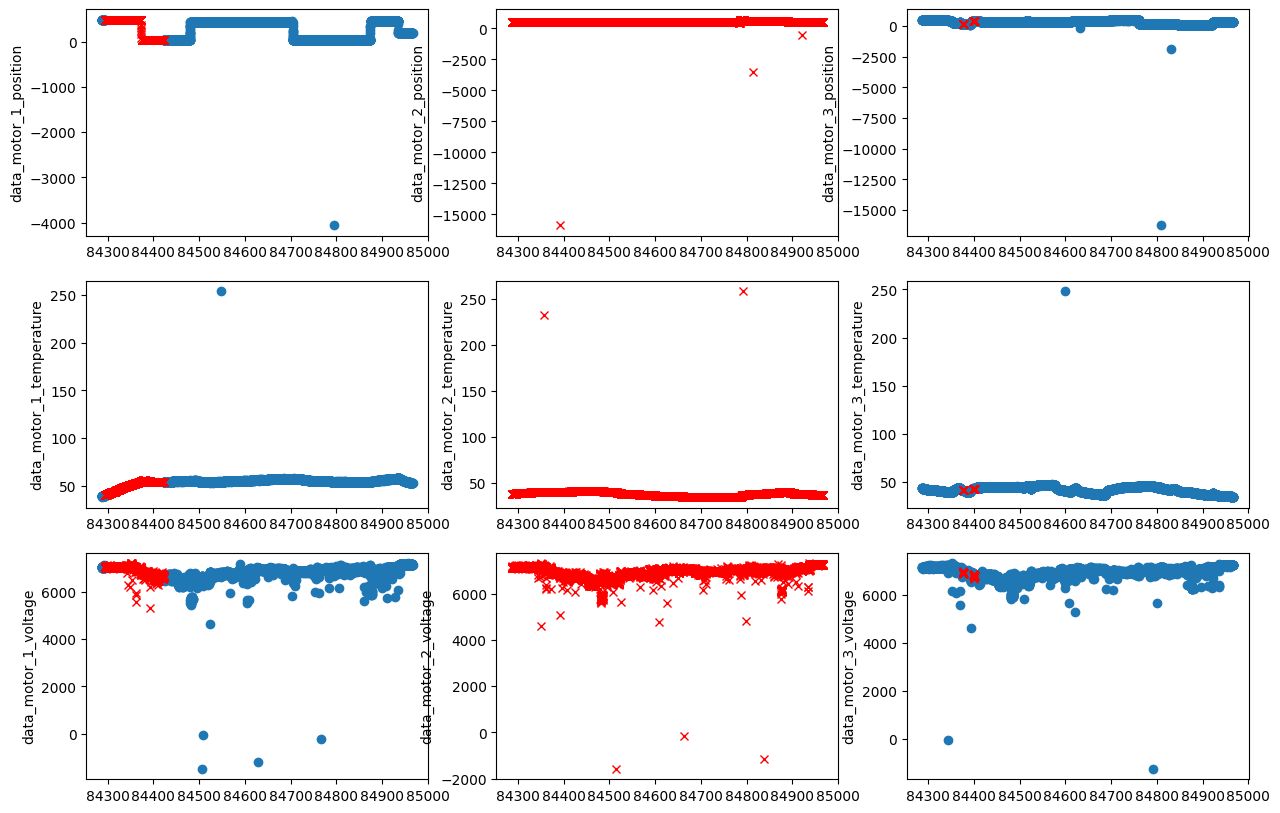

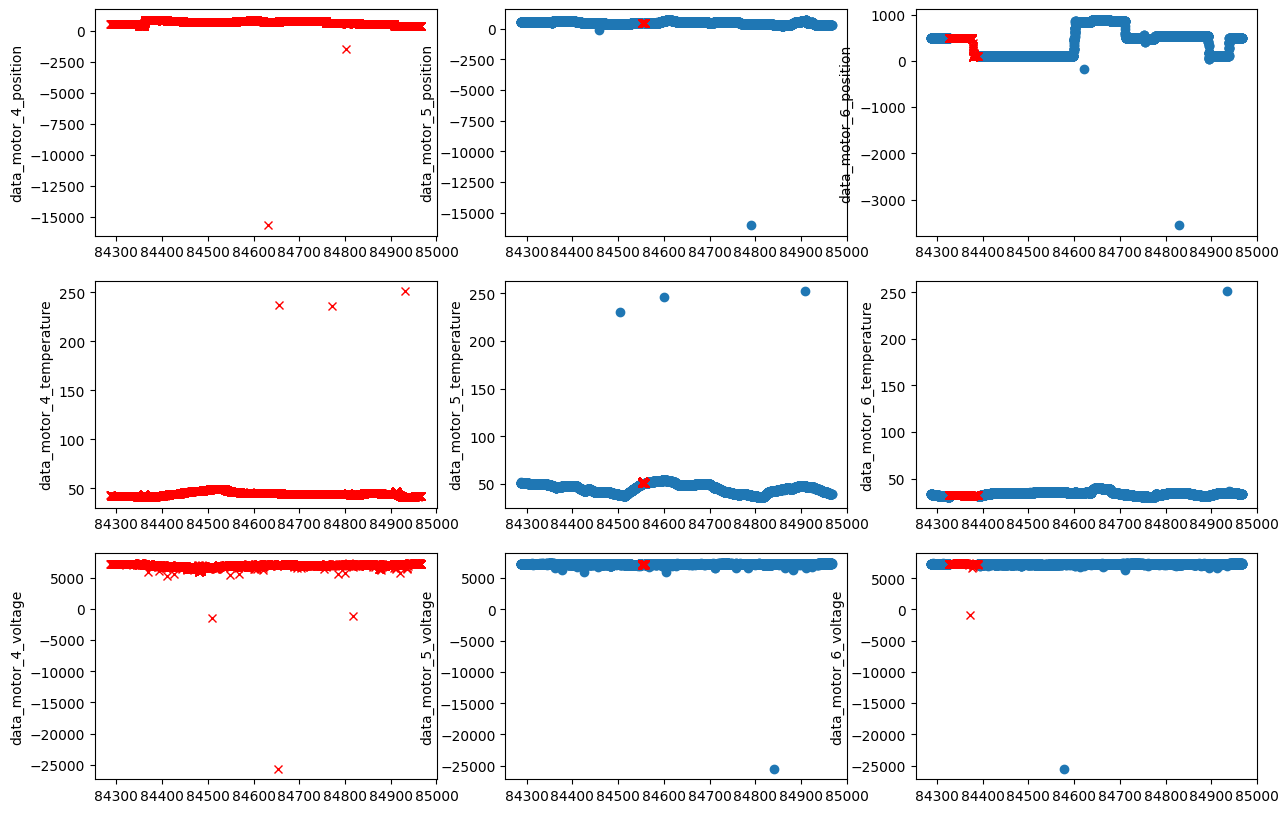

In [1]:
import sys
sys.path.append('../../supporting_scripts/WP_1')

from utility import read_all_test_data_from_path


df = read_all_test_data_from_path('../../dataset/training_data/', is_plot=True)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31135 entries, 0 to 31134
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      31135 non-null  float64
 1   data_motor_1_position     31135 non-null  int64  
 2   data_motor_1_temperature  31135 non-null  int64  
 3   data_motor_1_voltage      31135 non-null  int64  
 4   data_motor_1_label        31135 non-null  int64  
 5   data_motor_2_position     31135 non-null  int64  
 6   data_motor_2_temperature  31135 non-null  int64  
 7   data_motor_2_voltage      31135 non-null  int64  
 8   data_motor_2_label        31135 non-null  int64  
 9   data_motor_3_position     31135 non-null  int64  
 10  data_motor_3_temperature  31135 non-null  int64  
 11  data_motor_3_voltage      31135 non-null  int64  
 12  data_motor_3_label        31135 non-null  int64  
 13  data_motor_4_position     31135 non-null  int64  
 14  data_m

For each motors, there are 4 columns : 
- the *position*
- the *temperature* 
- the *voltage*
- the *label* (which is 0 if there is no abnormaly).  
   
There is also a column named *test_condition* which gives the condition of the measurement and a column *time*.

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

- There is some noise for continuous features like voltage, thus we need to apply a moving average algorithm to smooth the data.
- Scaling the features is always usefull so the have the same weights in classification algorithms. Here we have outliers so a standardization is relevant.
- Like we said, we have lots of outliers especially for the position's features, we have to remove them otherwise it could mislead our classification algorithms
- We don't have any missing values like shows the next cell
- It seems like hot temperature and motor's issue are highly correlated
- While the robot status is normal, the temperature usually do not increase quickly

In [3]:
#To check for missing values

import numpy as np

S = 0
for cols in df.columns:
    S += sum(np.asarray(df[cols].isnull()))
    
S

0

## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

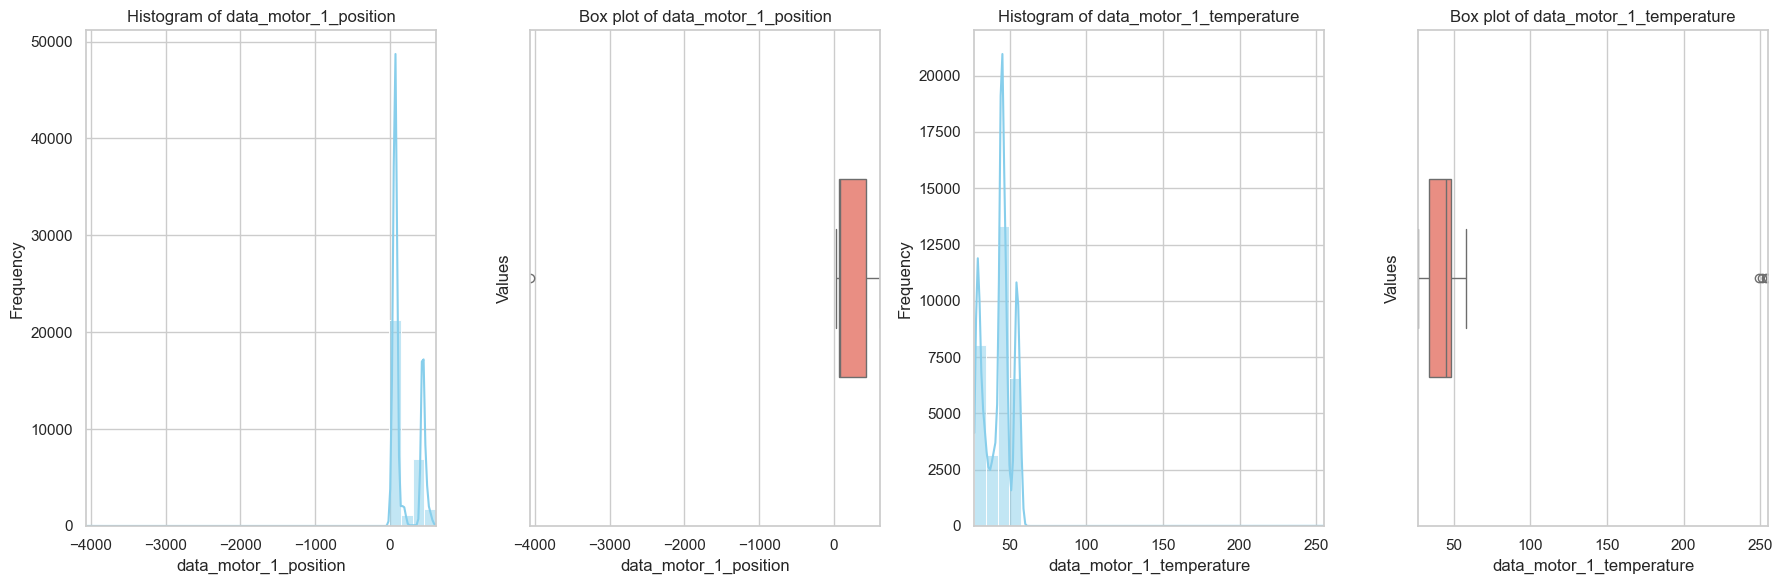

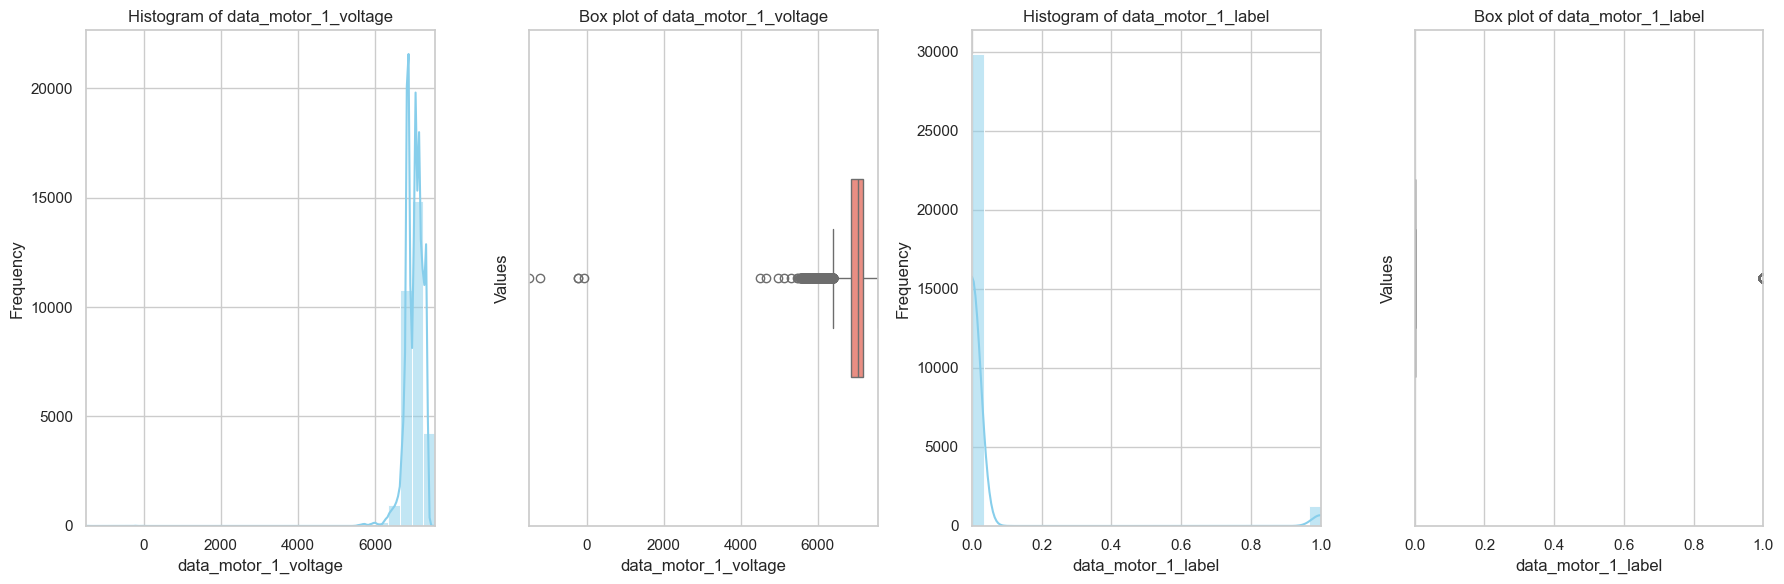

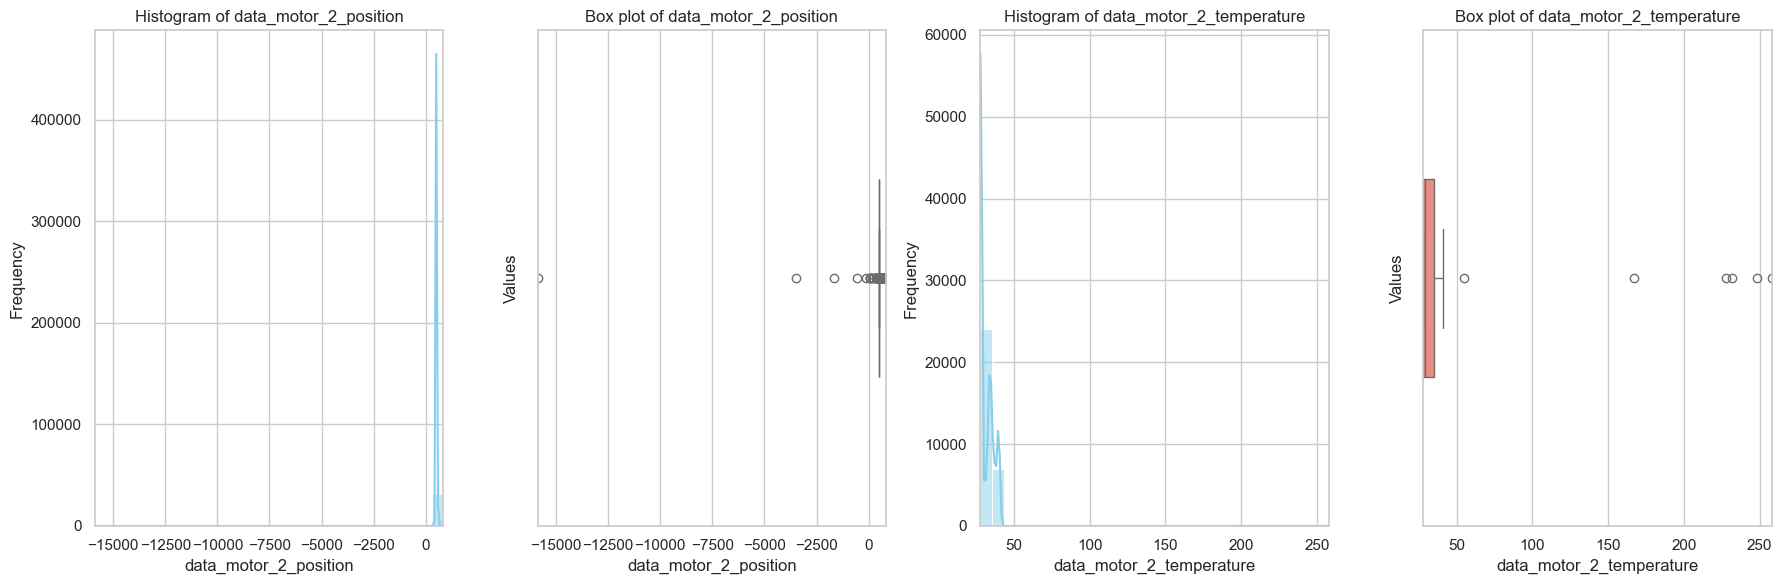

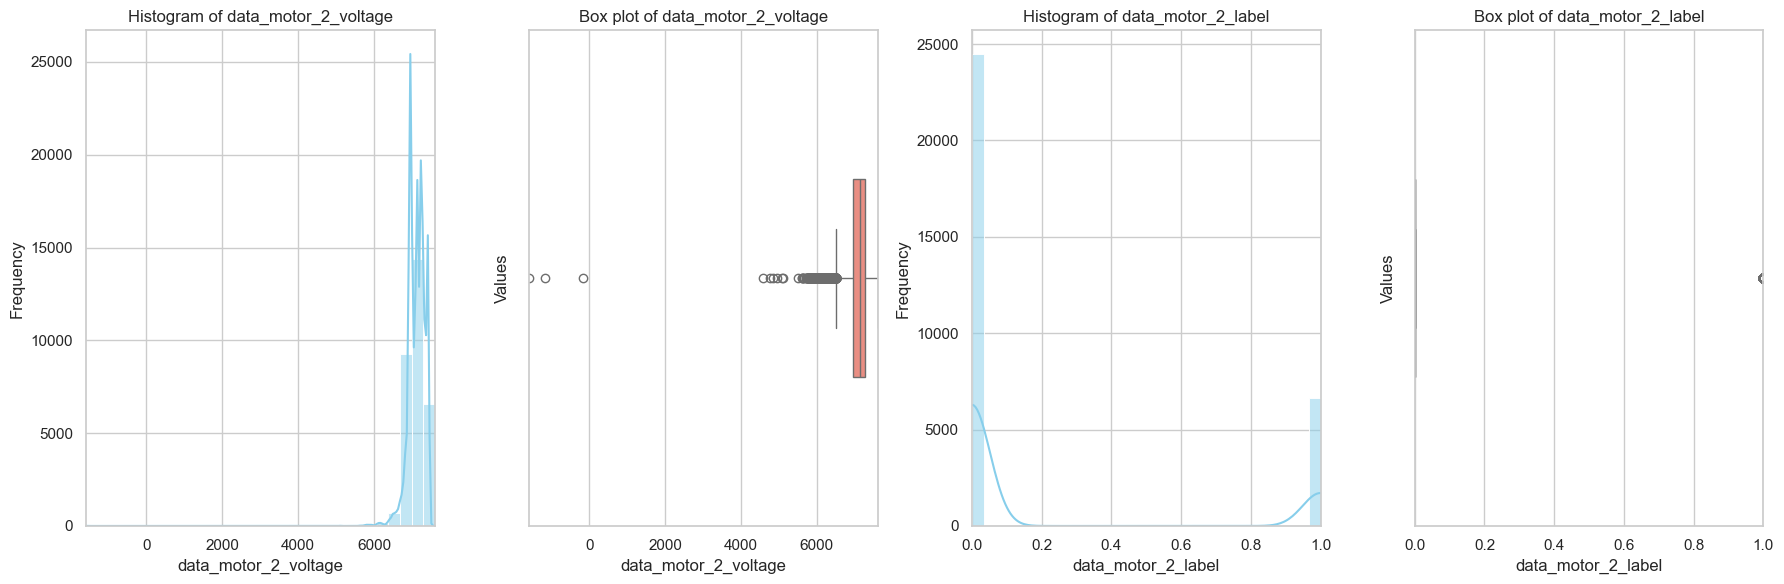

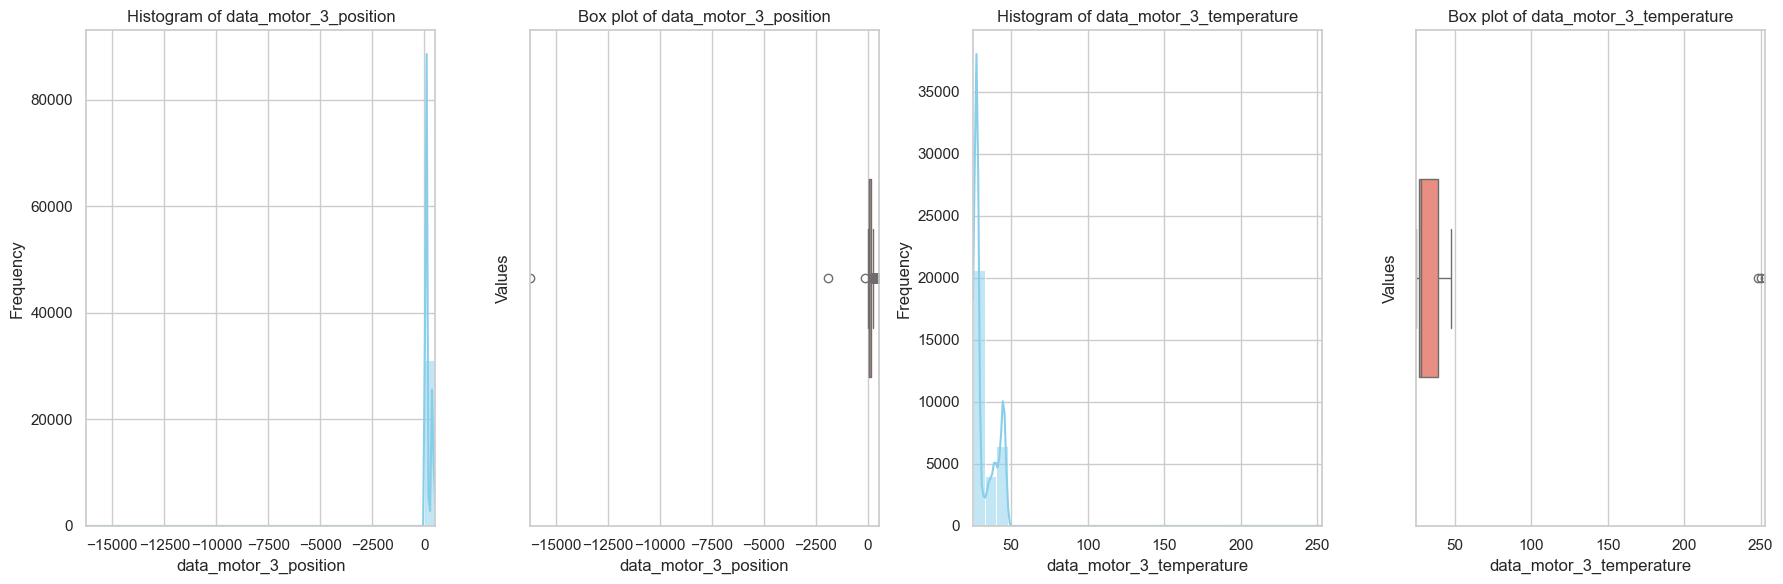

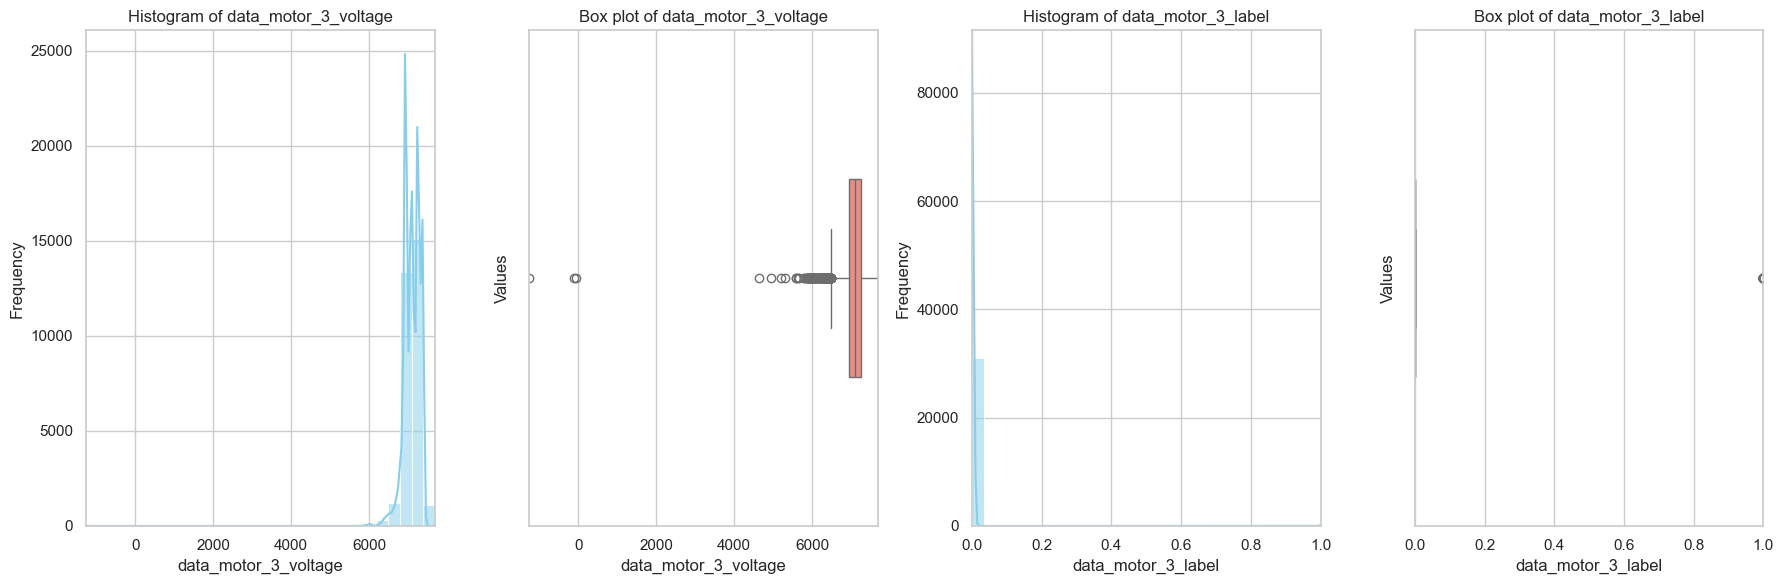

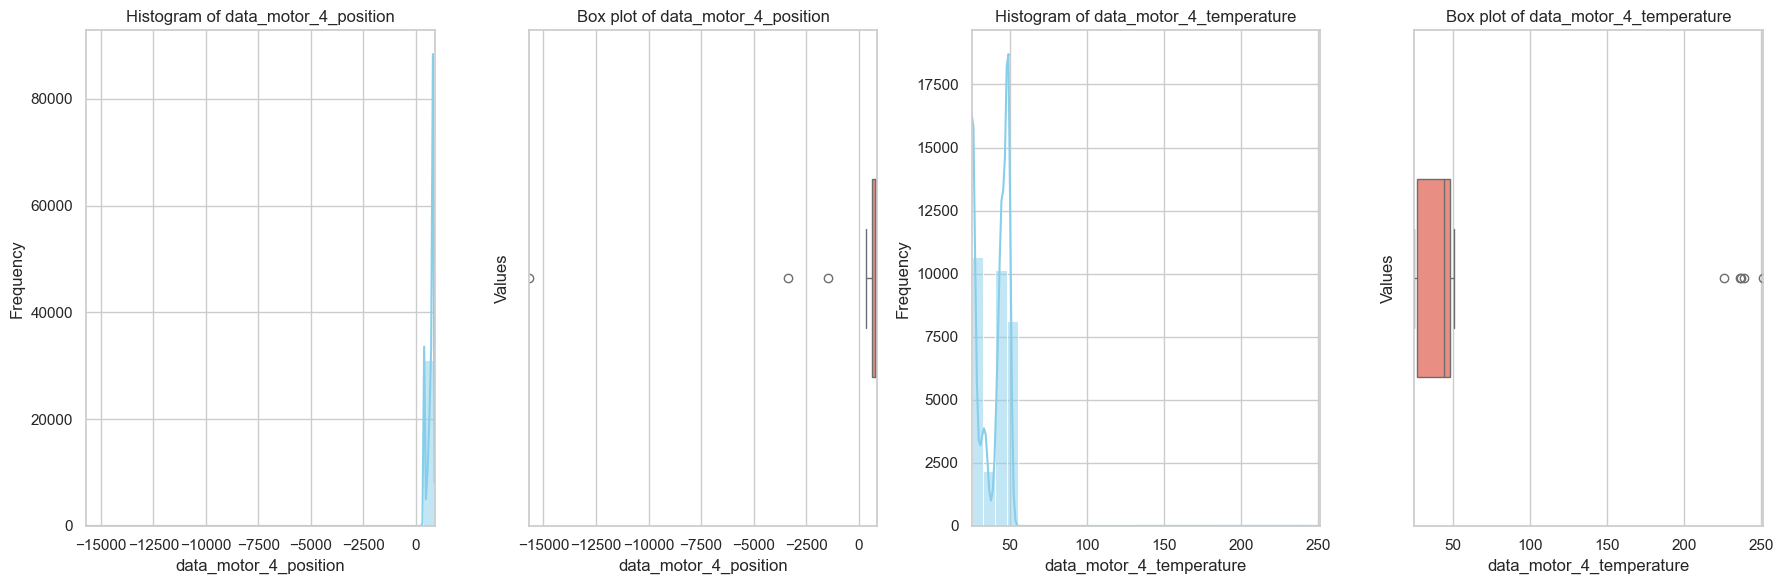

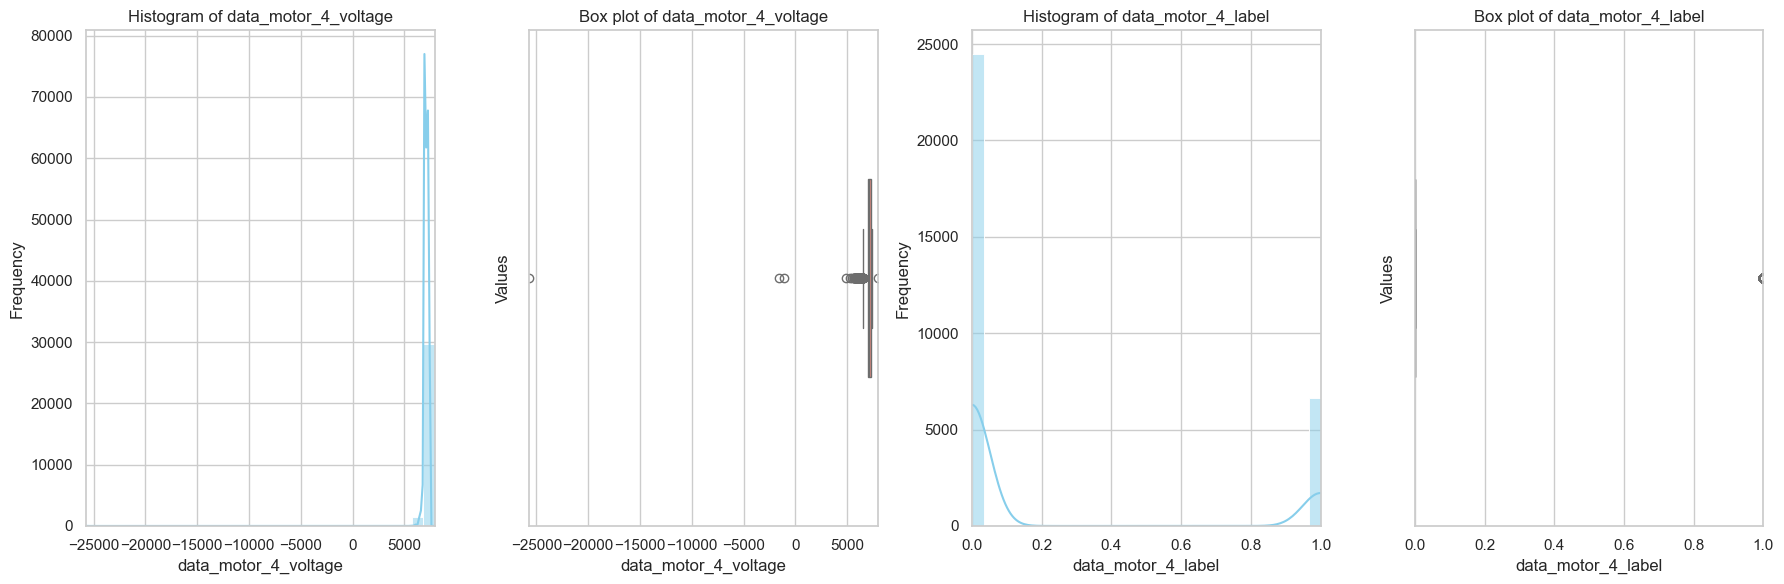

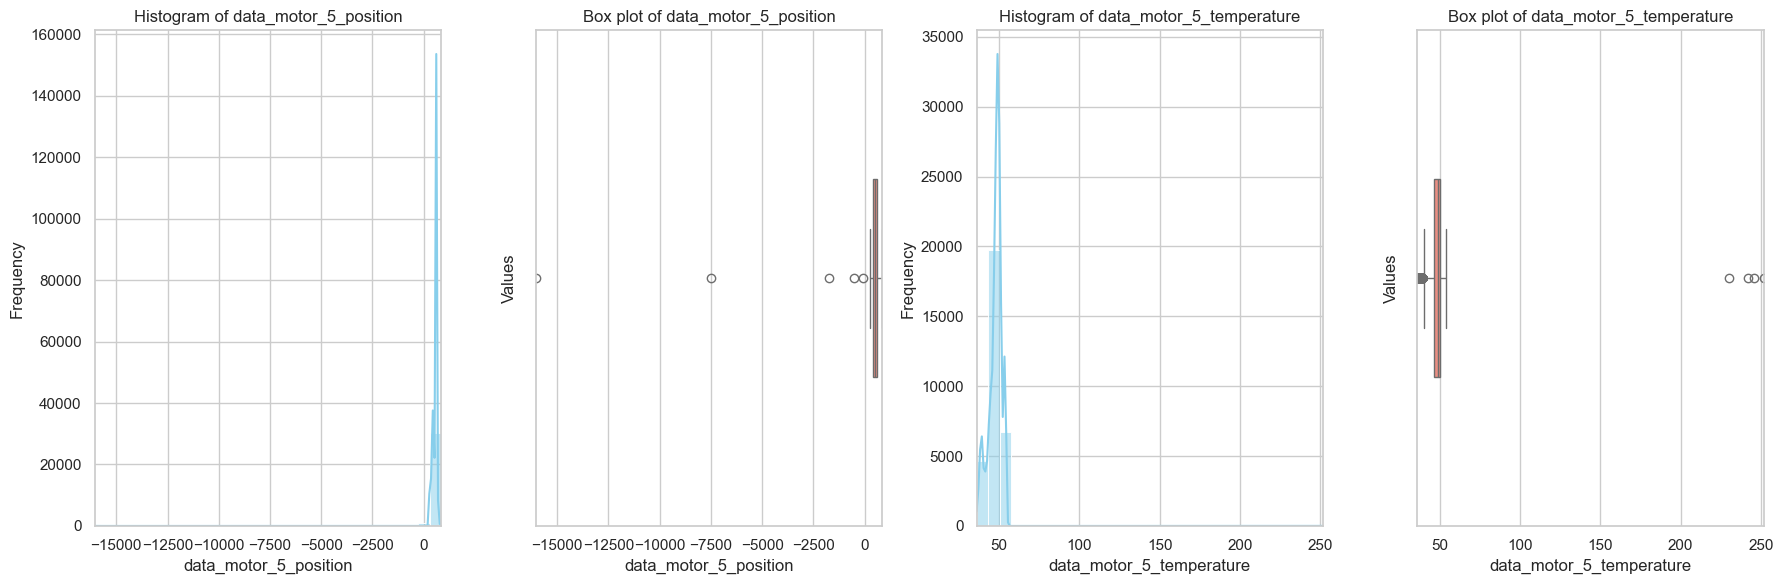

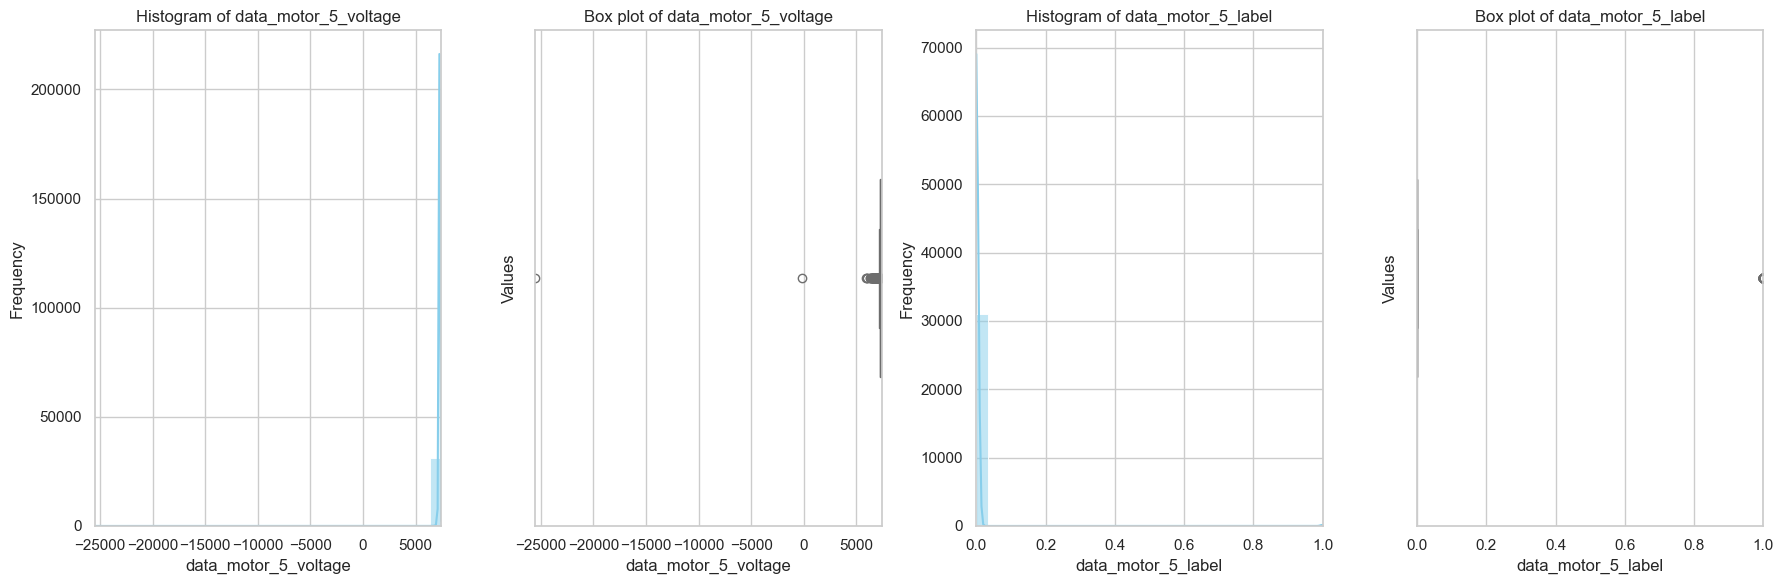

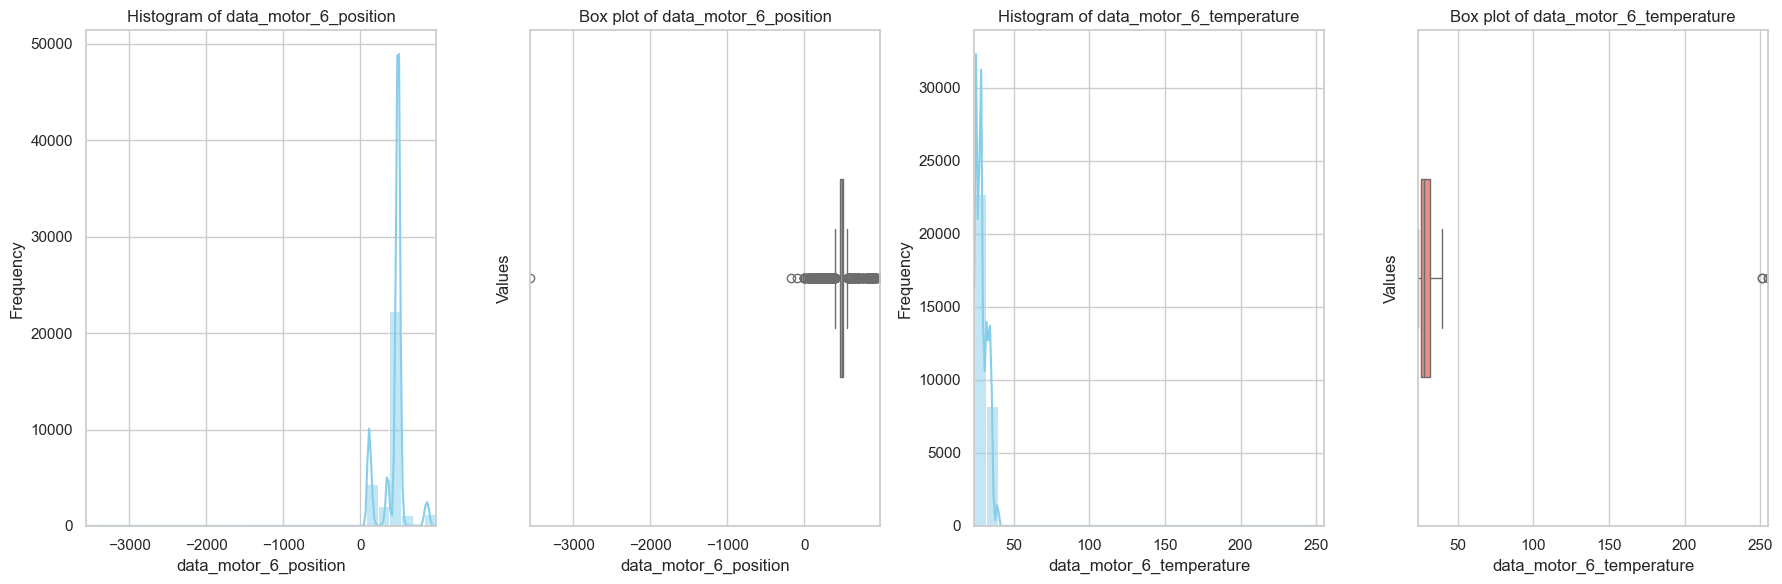

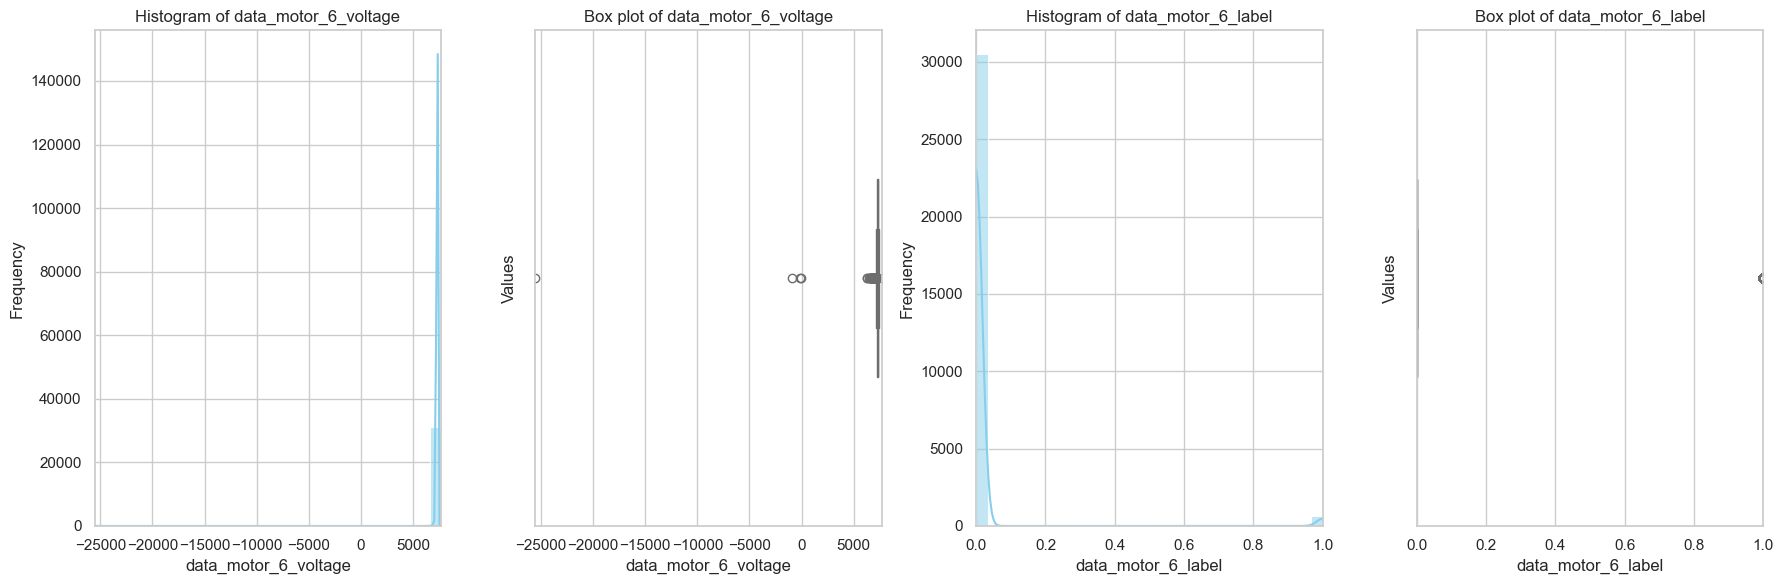

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = df.columns[1:-1]

sns.set(style="whitegrid")

num_rows = (len(columns_to_plot) + 1) // 2

for i in range(num_rows):
    fig, axes = plt.subplots(1, 4, figsize=(18, 6))

    for j in range(2):
        idx = i * 2 + j

        if idx < len(columns_to_plot):
            column = columns_to_plot[idx]
            min_val = df[column].min()
            max_val = df[column].max()

            # Plot histogram
            sns.histplot(df, x=column, ax=axes[j * 2], kde=True, color='skyblue', bins=30)
            axes[j * 2].set_title(f'Histogram of {column}')
            axes[j * 2].set_xlabel(column)
            axes[j * 2].set_ylabel('Frequency')
            axes[j * 2].set_xlim(min_val, max_val)

            # Plot box plot
            sns.boxplot(x=df[column], ax=axes[j * 2 + 1], color='salmon', width=0.4)
            axes[j * 2 + 1].set_title(f'Box plot of {column}')
            axes[j * 2 + 1].set_xlabel(column)
            axes[j * 2 + 1].set_ylabel('Values')
            axes[j * 2 + 1].set_xlim(min_val, max_val)

    plt.tight_layout()
    plt.show()


## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

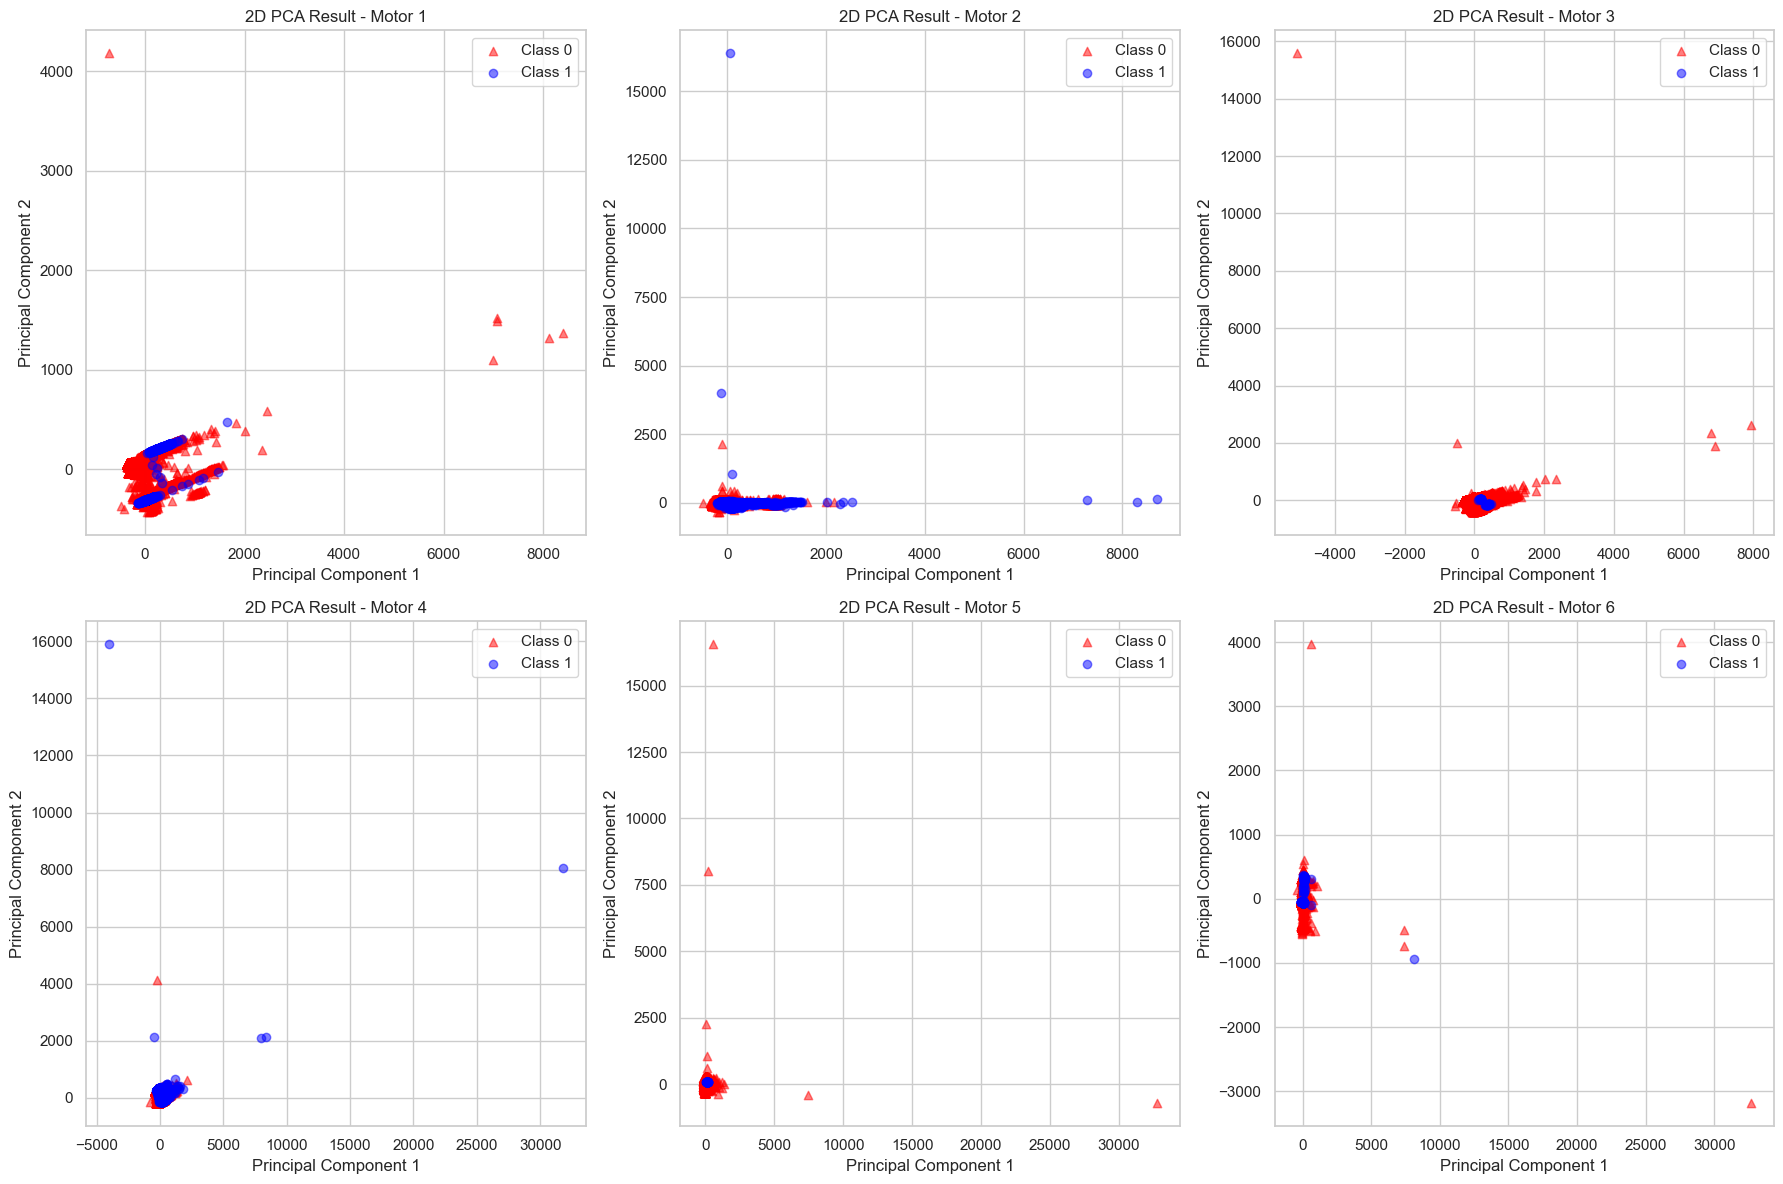

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


motors = ['1', '2', '3', '4', '5', '6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, motor in enumerate(motors):
    X = df[[f'data_motor_{motor}_position', f'data_motor_{motor}_temperature', f'data_motor_{motor}_voltage']]
    y = df[f'data_motor_{motor}_label']
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    ax = axes[i//3, i%3]
    ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    ax.set_title(f'2D PCA Result - Motor {motor}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


### What can you see from the results?
What we can guess from the plot is that the data is not linearly separable if we only take 2 components for every motor.

In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

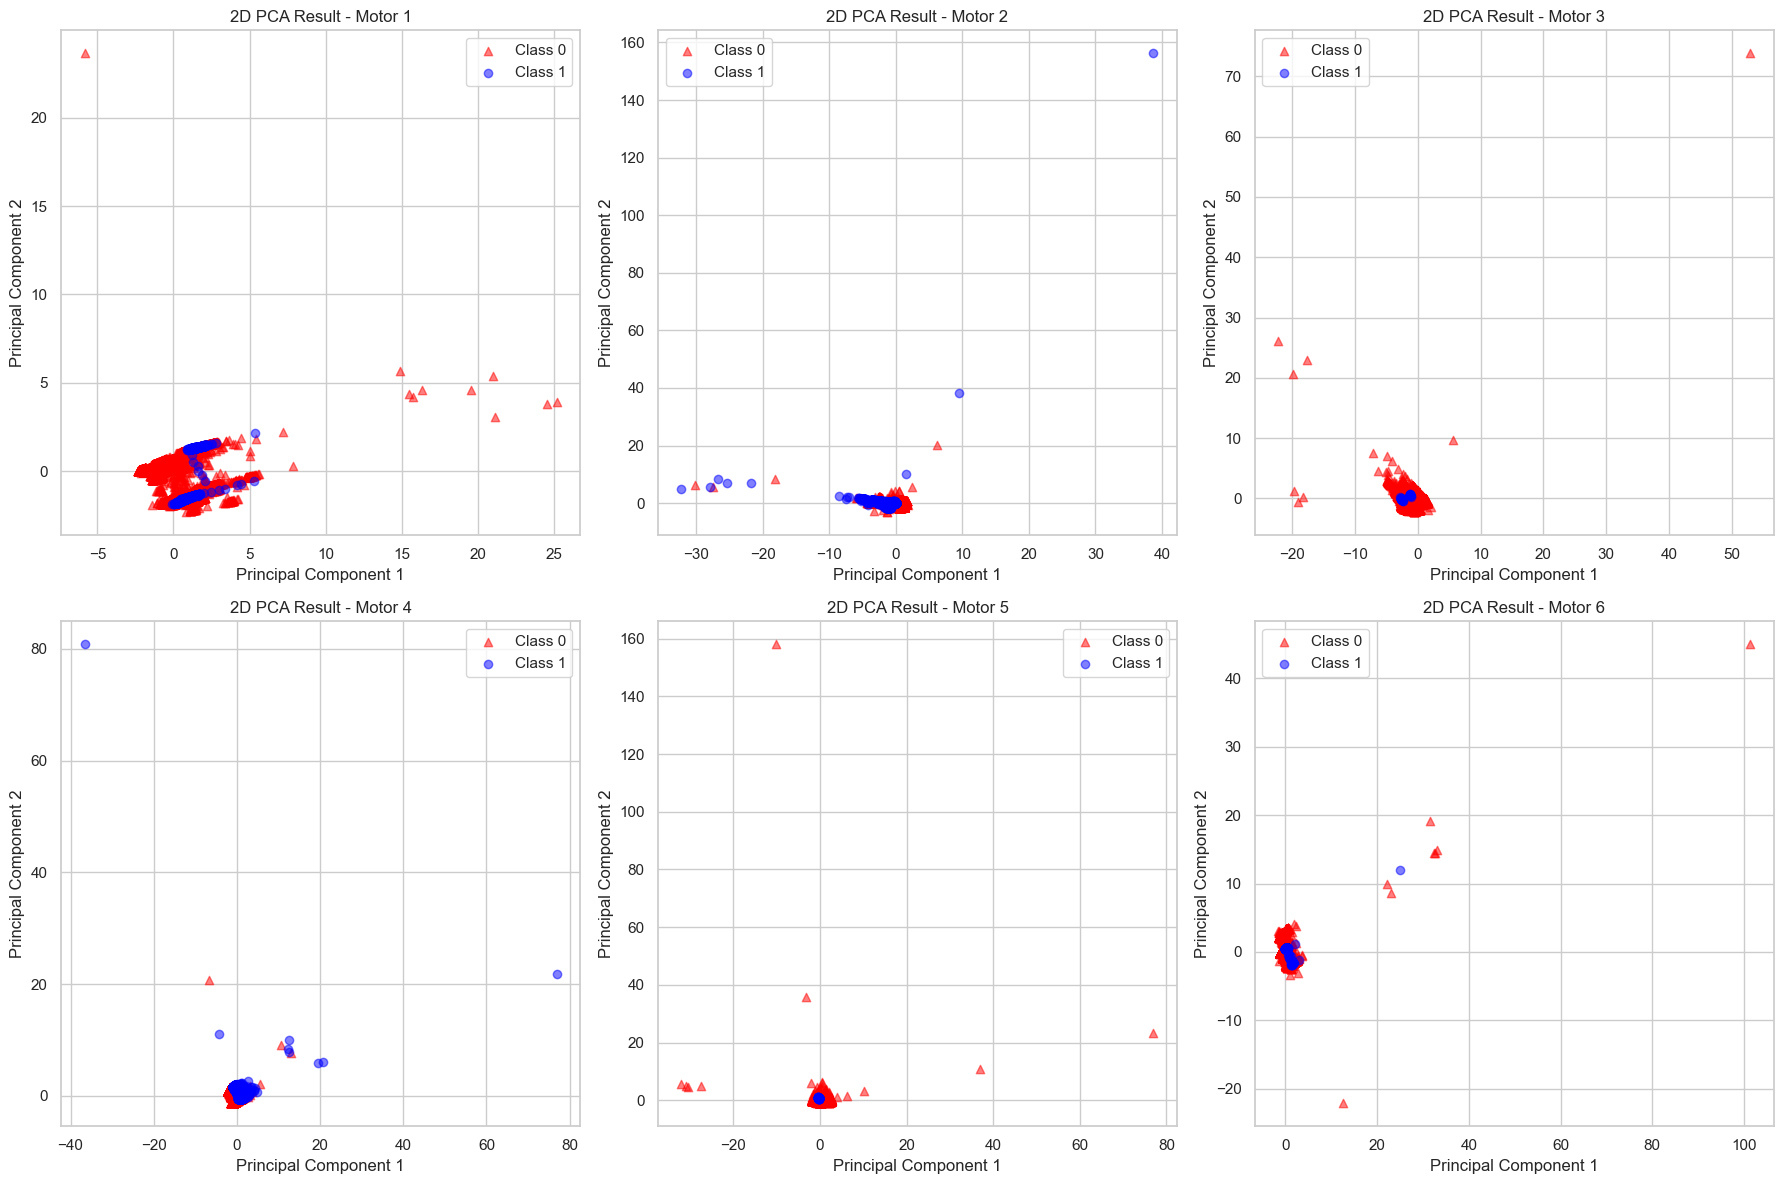

In [6]:
#Standardization : 
from sklearn.preprocessing import StandardScaler
motors = ['1', '2', '3', '4', '5', '6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, motor in enumerate(motors):
    X = df[[f'data_motor_{motor}_position', f'data_motor_{motor}_temperature', f'data_motor_{motor}_voltage']]
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = df[f'data_motor_{motor}_label']
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    ax = axes[i//3, i%3]
    ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    ax.set_title(f'2D PCA Result - Motor {motor}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


We can see that for both motors 2 and 4 the standardization nearly made the data linearly separable.

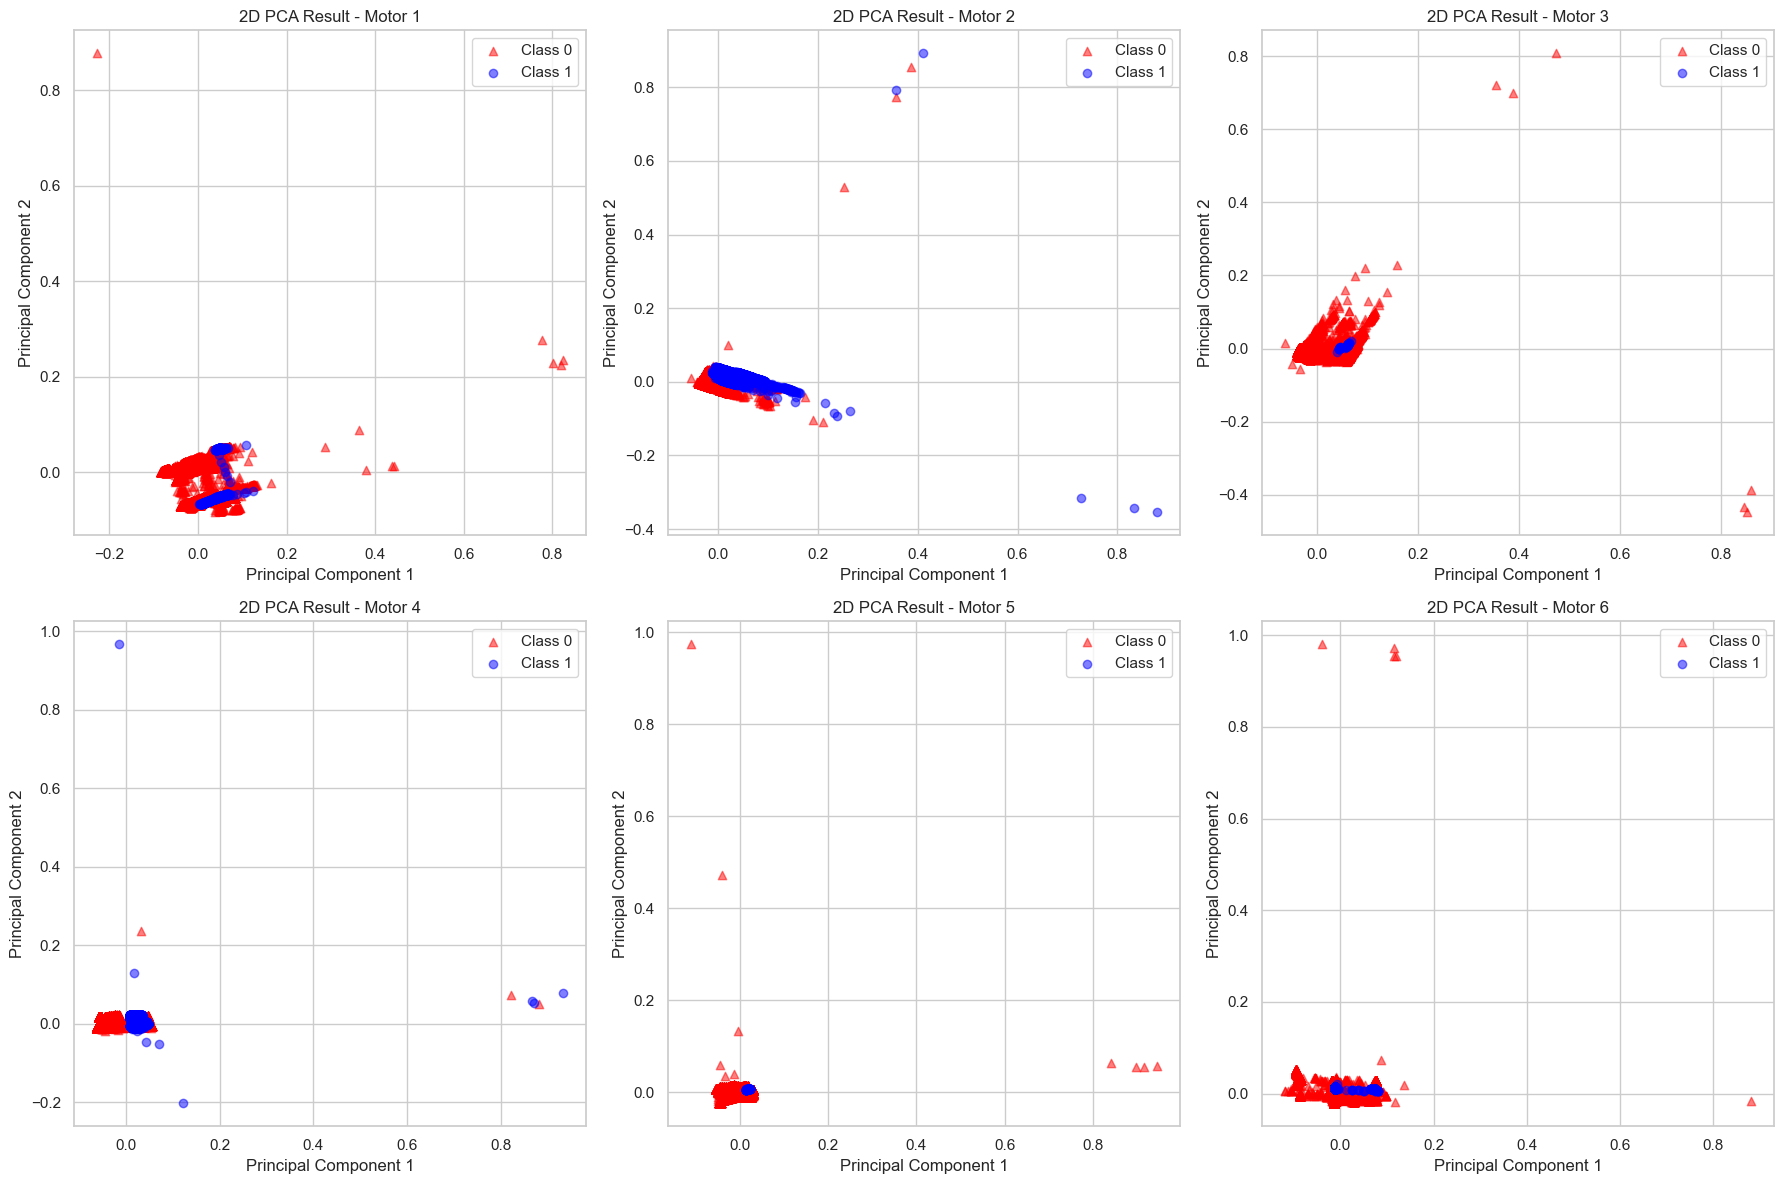

In [7]:
#Normalization : 
from sklearn.preprocessing import MinMaxScaler
motors = ['1', '2', '3', '4', '5', '6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, motor in enumerate(motors):
    X = df[[f'data_motor_{motor}_position', f'data_motor_{motor}_temperature', f'data_motor_{motor}_voltage']]
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    y = df[f'data_motor_{motor}_label']
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    ax = axes[i//3, i%3]
    ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    ax.set_title(f'2D PCA Result - Motor {motor}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


Once more, it's better than not normalizing the data. As a matter of fact, it seems better to normalize data for the motor 2 but it's better to standardize for motor 4. 

Anyway, we have to use the 3 components to separate the data because standardization/normalization doesn't work for motors 1, 3, 5 and 6 with only the 2-PCA.

# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

In [16]:
#We want to standardize position, voltage and temperature and not the time, label and test_condition :

col_to_clean = [col for col in df.columns if ('time' not in col and 'test' not in col and 'label' not in col)]
col_not_to_clean = [col for col in df.columns if not('time' not in col and 'test' not in col and 'label' not in col)]

df_scaled = df[col_to_clean].copy()

scaler = StandardScaler()
cols = df[col_to_clean].columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
df_scaled.columns = cols

df_scaled = pd.concat([df_scaled, df[col_not_to_clean]], axis=1)

df_scaled.describe()

data_motor_1_position  data_motor_1_temperature  data_motor_1_voltage  \
count           3.113500e+04              3.113500e+04          3.113500e+04   
mean           -2.921133e-17              4.673813e-16         -8.471285e-16   
std             1.000016e+00              1.000016e+00          1.000016e+00   
min            -2.435871e+01             -1.719586e+00         -3.497556e+01   
25%            -6.381534e-01             -9.619929e-01         -6.362396e-01   
50%            -5.404670e-01              2.285101e-01          1.205499e-01   
75%             1.459231e+00              5.531928e-01          6.223343e-01   
max             2.499304e+00              2.295630e+01          2.222286e+00   

       data_motor_2_position  data_motor_2_temperature  data_motor_2_voltage  \
count           3.113500e+04              3.113500e+04          3.113500e+04   
mean           -6.937690e-17              2.336906e-16          1.431355e-15   
std             1.000016e+00              1.000016e+00          1.000016e+00   
min            -1.611689e+02             -8.261781e-01         -3.770324e+01   
25%             1.590312e-02             -8.261781e-01         -6.553944e-01   
50%             1.590312e-02             -6.238829e-01          8.530261e-02   
75%             2.574106e-02              5.898887e-01          6.397424e-01   
max             3.311614e+00              4.570173e+01          2.112473e+00   

       data_motor_3_position  data_motor_3_temperature  data_motor_3_voltage  \
count           31135.000000              3.113500e+04          3.113500e+04   
mean                0.000000             -5.842266e-17          4.965926e-16   
std                 1.000016              1.000016e+00          1.000016e+00   
min              -100.677809             -9.274956e-01         -3.816331e+01   
25%                -0.417266             -6.634527e-01         -7.040906e-01   
50%                -0.411124             -5.314313e-01          3.289972e-03   
75%                 0.037236              9.208044e-01          7.106705e-01   
max                 2.340452              2.917339e+01          2.686772e+00   

       data_motor_4_position  ...  data_motor_6_position  \
count           3.113500e+04  ...           3.113500e+04   
mean            2.190850e-17  ...          -1.606623e-16   
std             1.000016e+00  ...           1.000016e+00   
min            -8.964289e+01  ...          -2.535687e+01   
25%            -4.168363e-01  ...           9.917367e-02   
50%             3.487240e-01  ...           3.397431e-01   
75%             6.494798e-01  ...           3.460739e-01   
max             9.775770e-01  ...           3.422830e+00   

       data_motor_6_temperature  data_motor_6_voltage          time  \
count              3.113500e+04          3.113500e+04  31135.000000   
mean               2.336906e-16         -2.263878e-16  80141.374898   
std                1.000016e+00          1.000016e+00   3283.277642   
min               -1.126843e+00         -1.561530e+02  76522.025433   
25%               -6.759839e-01         -1.776983e-01  77405.635319   
50%               -2.251252e-01         -1.804144e-03  77789.390419   
75%                6.765921e-01          2.549062e-01  83562.256764   
max                5.094733e+01          1.928278e+00  84966.826470   

       data_motor_1_label  data_motor_2_label  data_motor_3_label  \
count        31135.000000        31135.000000        31135.000000   
mean             0.041497            0.213650            0.001413   
std              0.199439            0.409889            0.037567   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       data_motor_4_label  data_motor_5_l

We chose to standardize the data because we have lots of outliers and the historigrams look like gaussian curves.

## Task 2: Define a strategy to remove outliers.


In [9]:
col_to_clean = [col for col in df_scaled.columns if ('time' not in col and 'test' not in col and 'label' not in col)]
cleaned_df = df_scaled.copy()

for column in col_to_clean : 
    Q1 = df_scaled[column].quantile(0.25)
    Q3 = df_scaled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_df[column]= np.where(cleaned_df[column] > upper_bound, upper_bound, cleaned_df[column])
    cleaned_df[column] = np.where(cleaned_df[column] < lower_bound, lower_bound, cleaned_df[column])
    
cleaned_df.describe()

data_motor_1_position  data_motor_1_temperature  data_motor_1_voltage  \
count           31135.000000              31135.000000          31135.000000   
mean                0.000661                 -0.002548              0.019933   
std                 0.990673                  0.966996              0.853250   
min                -3.784231                 -1.719586             -2.524100   
25%                -0.638153                 -0.961993             -0.636240   
50%                -0.540467                  0.228510              0.120550   
75%                 1.459231                  0.553193              0.622334   
max                 2.499304                  2.825971              2.222286   

       data_motor_2_position  data_motor_2_temperature  data_motor_2_voltage  \
count           31135.000000              31135.000000          31135.000000   
mean                0.019153                 -0.005945              0.018008   
std                 0.012872                  0.863395              0.876210   
min                 0.001146                 -0.826178             -2.598100   
25%                 0.015903                 -0.826178             -0.655394   
50%                 0.015903                 -0.623883              0.085303   
75%                 0.025741                  0.589889              0.639742   
max                 0.040498                  2.713989              2.112473   

       data_motor_3_position  data_motor_3_temperature  data_motor_3_voltage  \
count           31135.000000              31135.000000          31135.000000   
mean               -0.162468                 -0.002459              0.012307   
std                 0.492095                  0.959701              0.901486   
min                -1.099018                 -0.927496             -2.826232   
25%                -0.417266                 -0.663453             -0.704091   
50%                -0.411124                 -0.531431              0.003290   
75%                 0.037236                  0.920804              0.710671   
max                 0.718988                  3.297190              2.686772   

       data_motor_4_position  ...  data_motor_6_position  \
count           31135.000000  ...           31135.000000   
mean                0.003781  ...               0.194945   
std                 0.849651  ...               0.271917   
min                -2.016310  ...              -0.271177   
25%                -0.416836  ...               0.099174   
50%                 0.348724  ...               0.339743   
75%                 0.649480  ...               0.346074   
max                 0.977577  ...               0.716424   

       data_motor_6_temperature  data_motor_6_voltage          time  \
count              31135.000000          31135.000000  31135.000000   
mean                  -0.006140              0.012617  80141.374898   
std                    0.820552              0.275640   3283.277642   
min                   -1.126843             -0.826605  76522.025433   
25%                   -0.675984             -0.177698  77405.635319   
50%                   -0.225125             -0.001804  77789.390419   
75%                    0.676592              0.254906  83562.256764   
max                    2.705456              0.903813  84966.826470   

       data_motor_1_label  data_motor_2_label  data_motor_3_label  \
count        31135.000000        31135.000000        31135.000000   
mean             0.041497            0.213650            0.001413   
std              0.199439            0.409889            0.037567   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       data_motor_4_label  data_motor_5_l

By removing all the outlier, we delete slightly more than 60% of the data which is too much. We lose lots of data because for example when motor 1 has an outlier at time t_0, we are also going to delete the data of all other motors at time t_0, even if there are no outliers. 
Thus, to solve this issue, we replace the value of the outliers to the theoretical max/min of a set of data. 

For example, if the input is bigger than the upper value, then it's an outlier and we replace it by the upper value.

Here we notice the new data are not standardized like shows the previous cell, so we have to do it again. 

In [10]:
cleaned_df_scaled = cleaned_df[col_to_clean].copy()

scaler = StandardScaler()
cols = cleaned_df[col_to_clean].columns
cleaned_df_scaled = pd.DataFrame(scaler.fit_transform(cleaned_df_scaled))
cleaned_df_scaled.columns = cols

cleaned_df_scaled = pd.concat([cleaned_df_scaled, cleaned_df[col_not_to_clean]], axis=1)

cleaned_df_scaled.describe()

data_motor_1_position  data_motor_1_temperature  data_motor_1_voltage  \
count           31135.000000              3.113500e+04          31135.000000   
mean                0.000000             -1.168453e-16              0.000000   
std                 1.000016              1.000016e+00              1.000016   
min                -3.820585             -1.775670e+00             -2.981628   
25%                -0.644839             -9.922073e-01             -0.769040   
50%                -0.546231              2.389481e-01              0.117924   
75%                 1.472326              5.747177e-01              0.706019   
max                 2.522207              2.925105e+00              2.581176   

       data_motor_2_position  data_motor_2_temperature  data_motor_2_voltage  \
count           3.113500e+04              3.113500e+04          3.113500e+04   
mean            2.044793e-16              1.168453e-16         -5.842266e-17   
std             1.000016e+00              1.000016e+00          1.000016e+00   
min            -1.398975e+00             -9.500238e-01         -2.985756e+00   
25%            -2.524945e-01             -9.500238e-01         -7.685521e-01   
50%            -2.524945e-01             -7.157180e-01          7.680321e-02   
75%             5.118258e-01              6.901163e-01          7.095838e-01   
max             1.658306e+00              3.150326e+00          2.390407e+00   

       data_motor_3_position  data_motor_3_temperature  data_motor_3_voltage  \
count           3.113500e+04              31135.000000          31135.000000   
mean           -5.842266e-17                  0.000000              0.000000   
std             1.000016e+00                  1.000016              1.000016   
min            -1.903220e+00                 -0.963896             -3.148785   
25%            -5.177902e-01                 -0.688761             -0.794698   
50%            -5.053088e-01                 -0.551193             -0.010002   
75%             4.058297e-01                  0.962049              0.774693   
max             1.791259e+00                  3.438263              2.966779   

       data_motor_4_position  ...  data_motor_6_position  \
count           31135.000000  ...           3.113500e+04   
mean                0.000000  ...           4.381699e-17   
std                 1.000016  ...           1.000016e+00   
min                -2.377592  ...          -1.714233e+00   
25%                -0.495055  ...          -3.522129e-01   
50%                 0.405988  ...           5.325182e-01   
75%                 0.759969  ...           5.558006e-01   
max                 1.146130  ...           1.917821e+00   

       data_motor_6_temperature  data_motor_6_voltage          time  \
count              3.113500e+04          3.113500e+04  31135.000000   
mean              -5.842266e-17          5.842266e-17  80141.374898   
std                1.000016e+00          1.000016e+00   3283.277642   
min               -1.365813e+00         -3.044682e+00  76522.025433   
25%               -8.163462e-01         -6.904613e-01  77405.635319   
50%               -2.668799e-01         -5.232083e-02  77789.390419   
75%                8.320528e-01          8.790194e-01  83562.256764   
max                3.304651e+00          3.233240e+00  84966.826470   

       data_motor_1_label  data_motor_2_label  data_motor_3_label  \
count        31135.000000        31135.000000        31135.000000   
mean             0.041497            0.213650            0.001413   
std              0.199439            0.409889            0.037567   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       data_motor_4_label  data_motor_5_l

## Task 3: Define a strategy to smooth the data.

To smooth the data and reduce noises, we choose a window_size and then we apply the rolling function : we slide the window across the dataset and calculate the average of the points in the window : we replace the original value by this mean. 

In [19]:
window_size = 3  
df_smooth = cleaned_df_scaled.copy()
for col in col_to_clean:
    smoothed_values = cleaned_df_scaled[col].rolling(window=window_size).mean()
    df_smooth[col] = smoothed_values


### Data after preprocessing

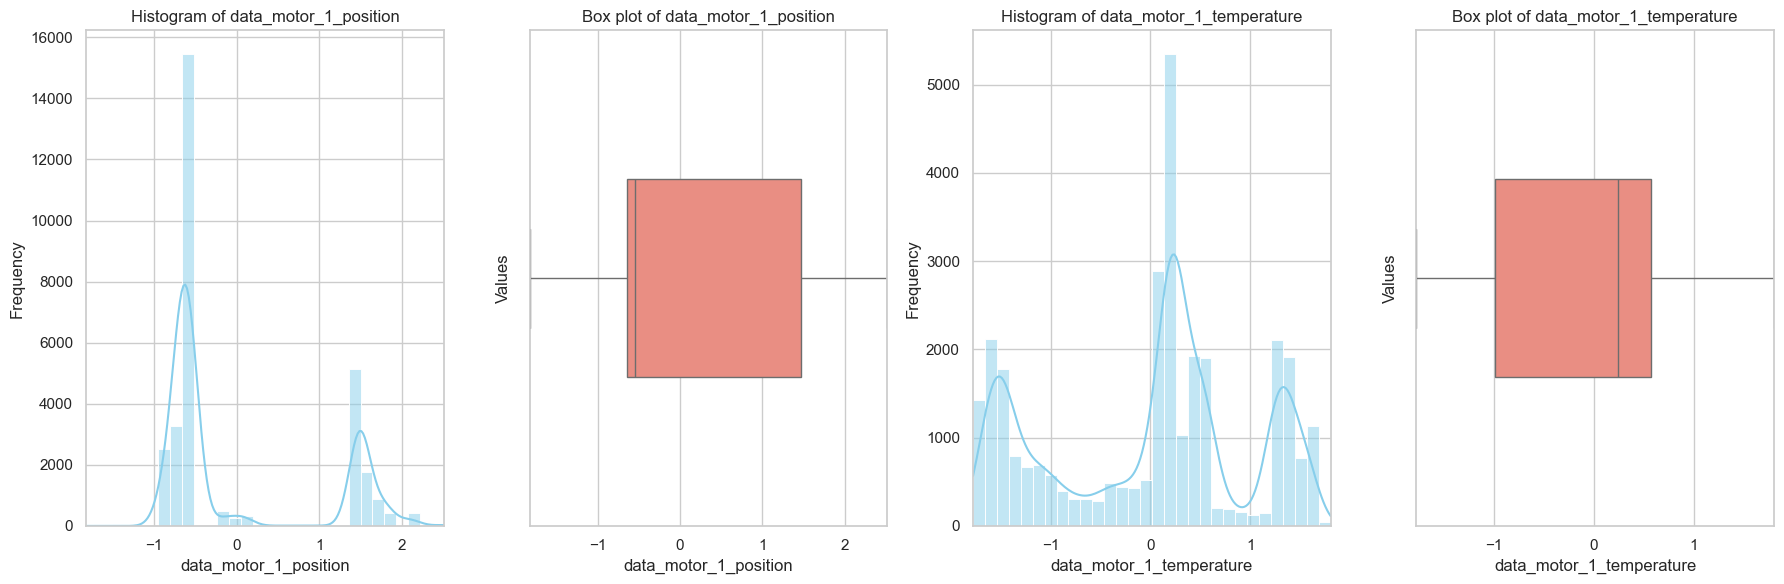

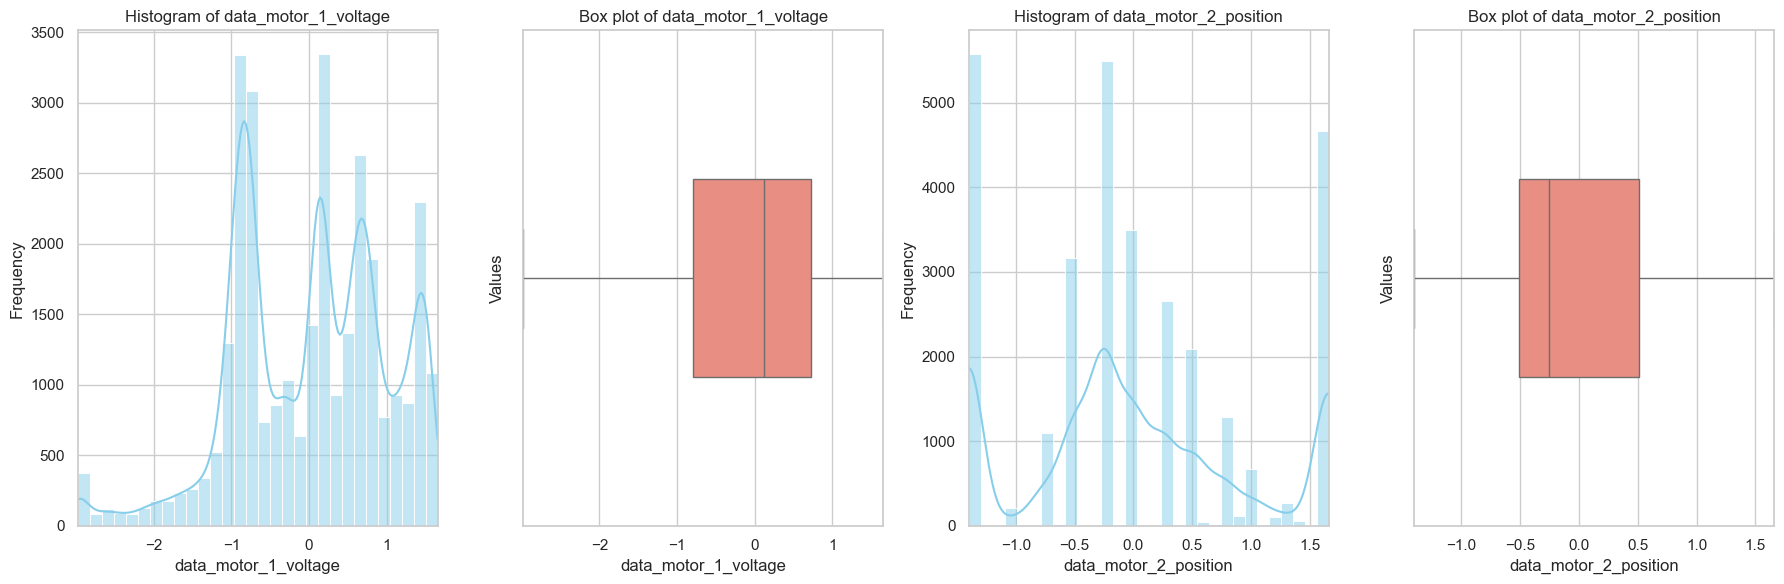

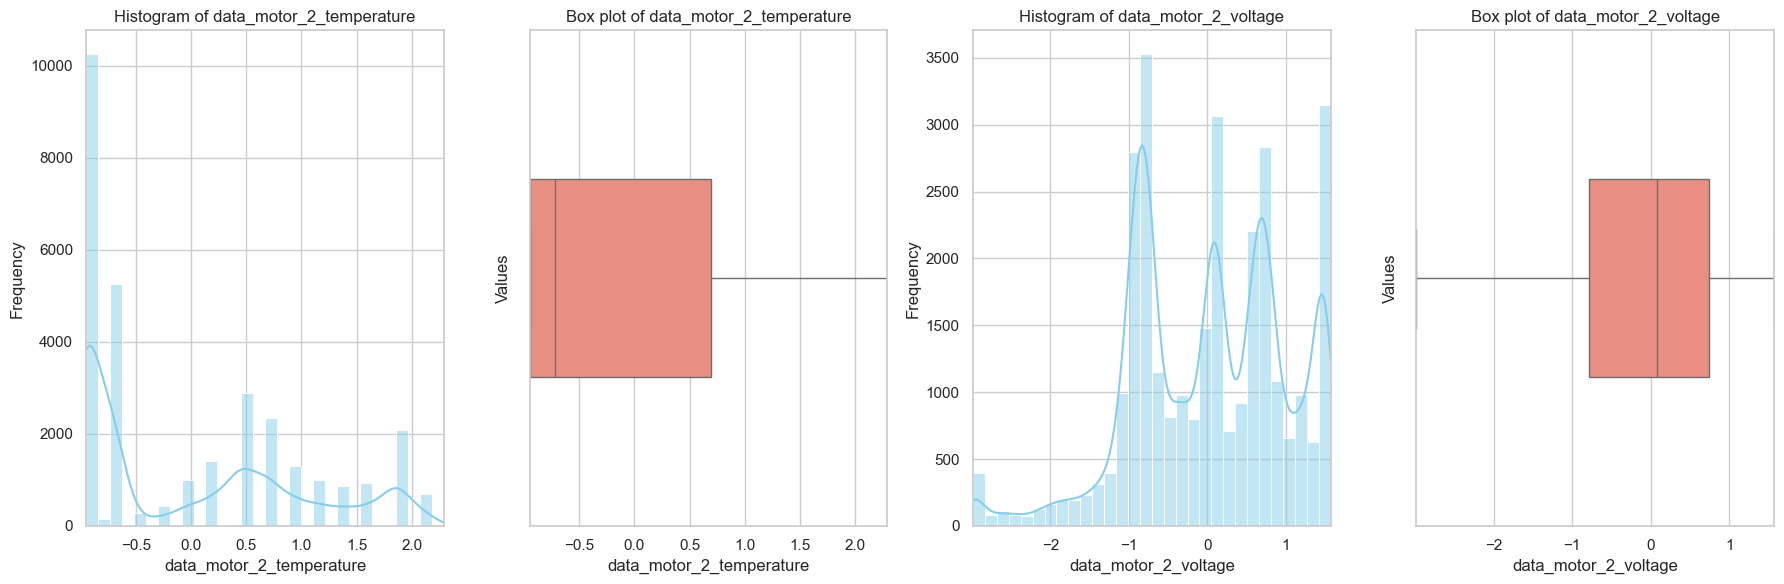

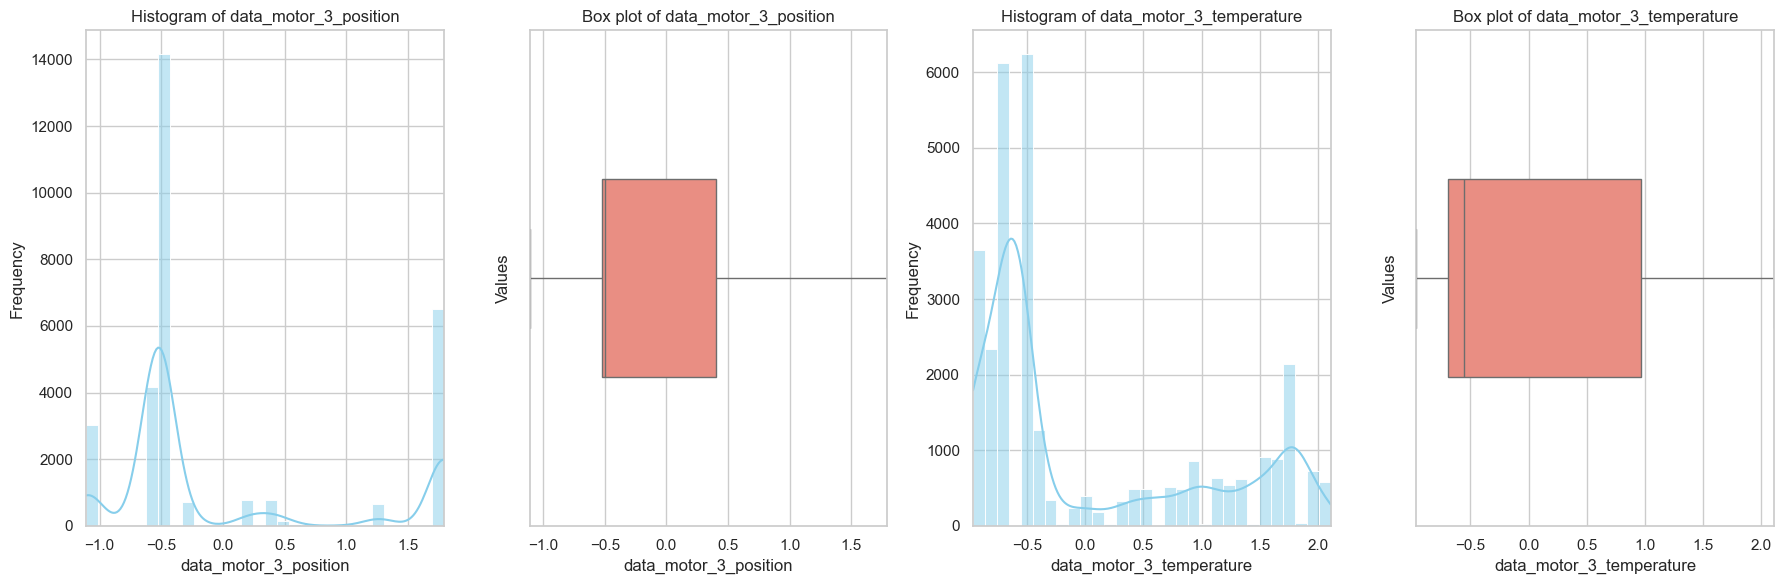

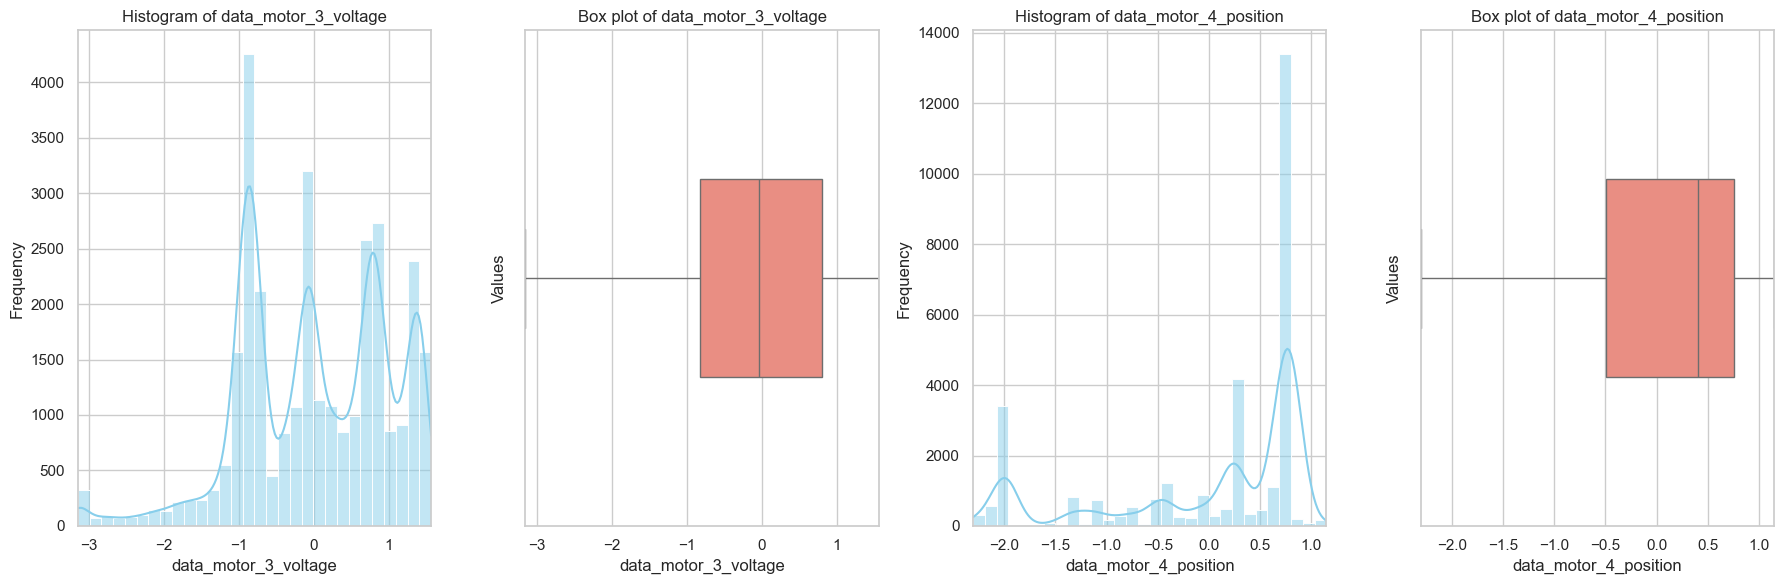

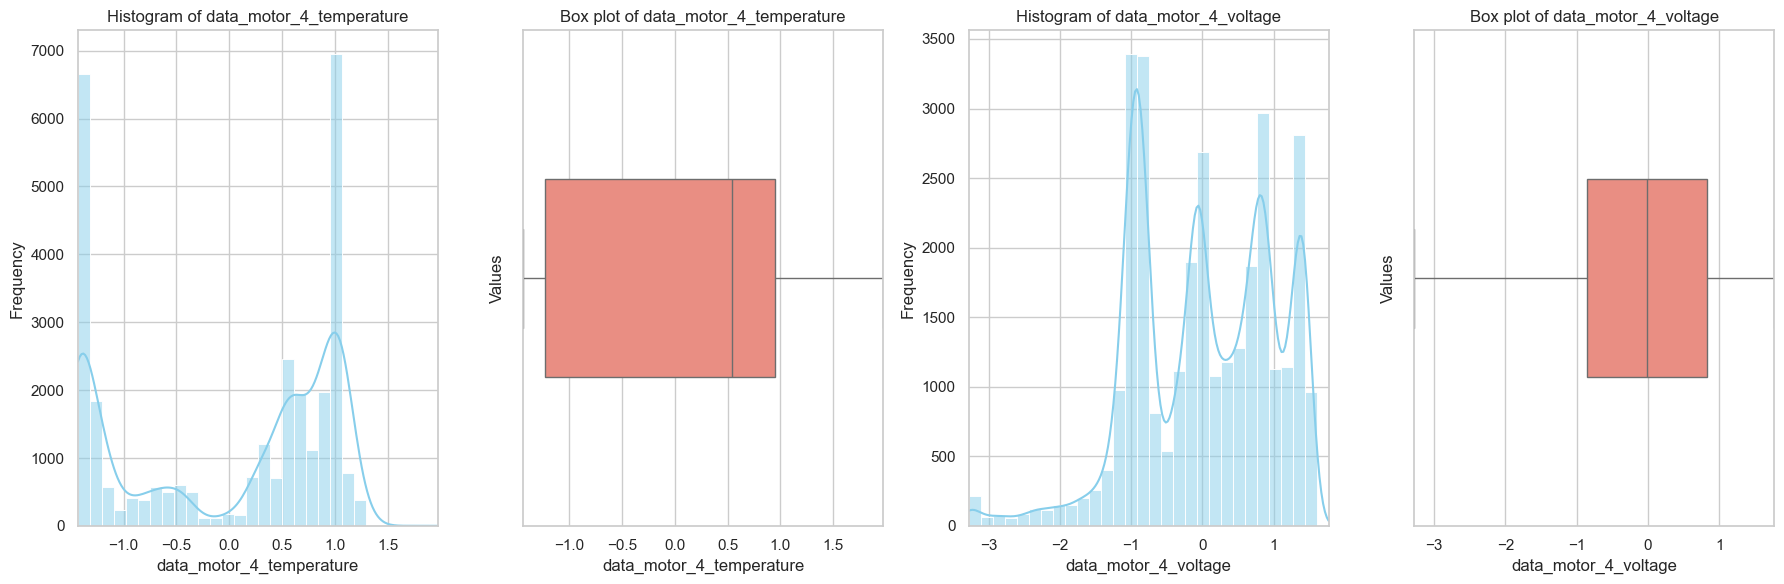

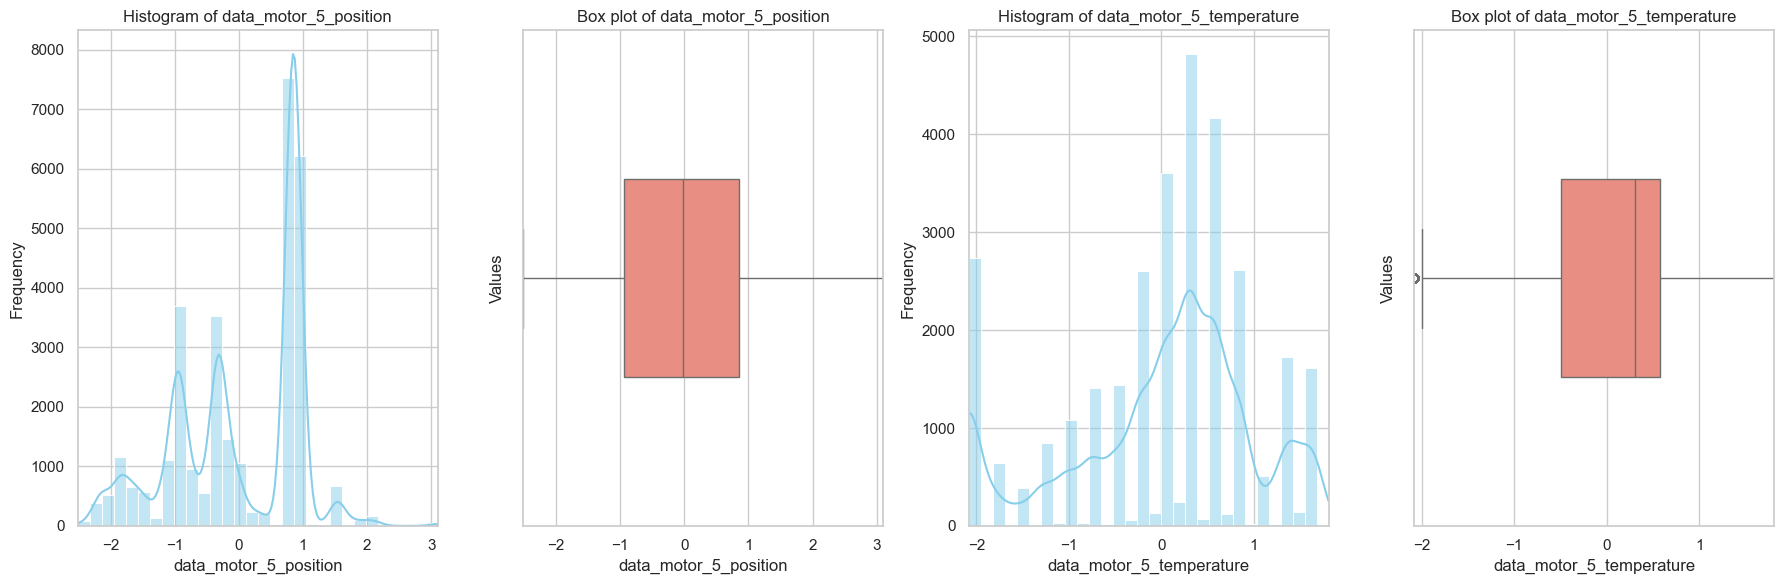

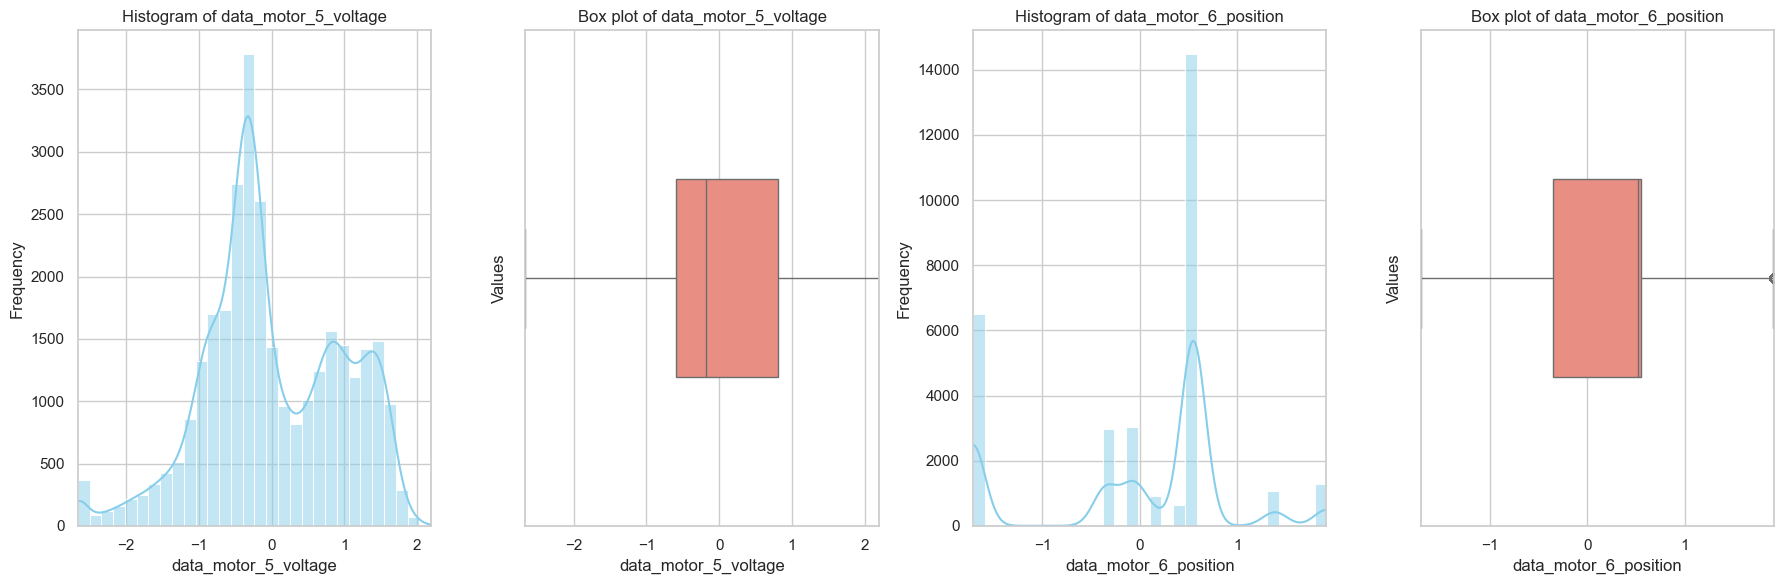

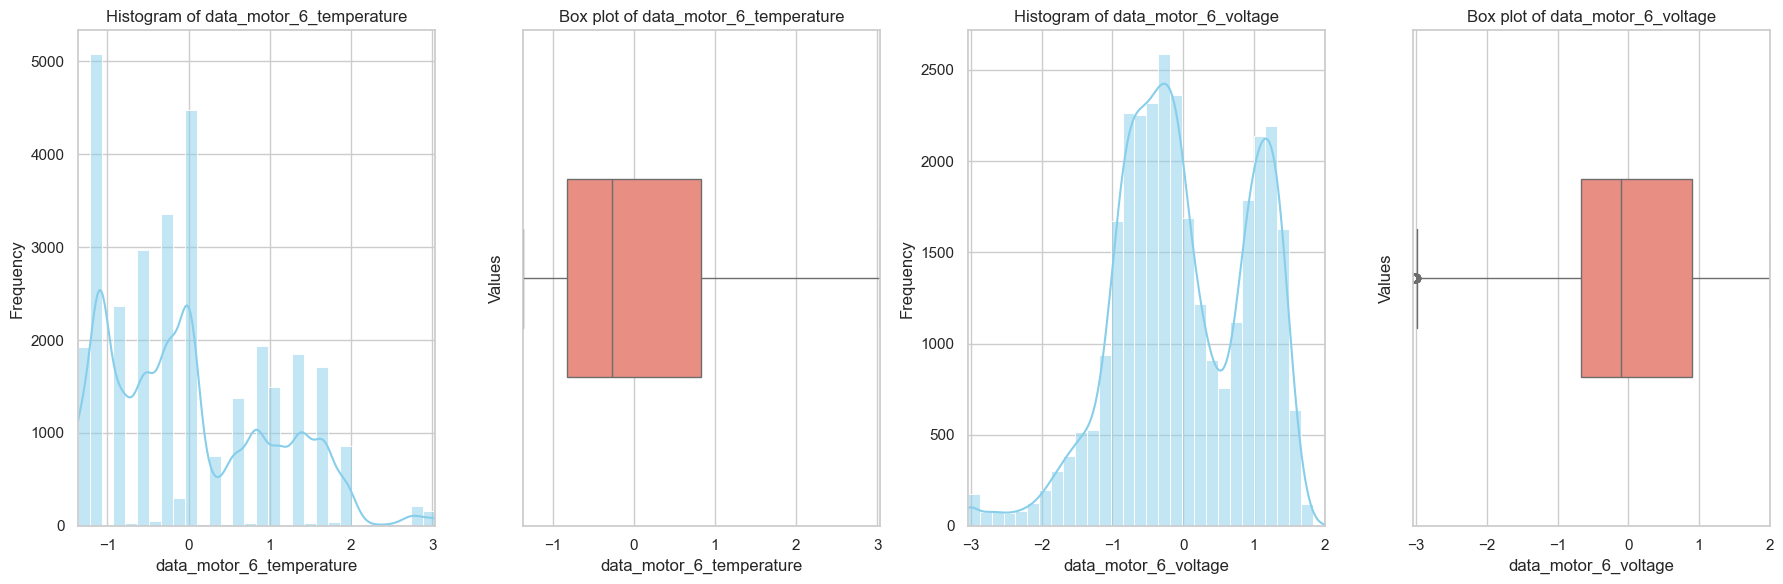

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = col_to_clean

sns.set(style="whitegrid")

num_rows = (len(columns_to_plot) + 1) // 2

for i in range(num_rows):
    fig, axes = plt.subplots(1, 4, figsize=(18, 6))

    for j in range(2):
        idx = i * 2 + j

        if idx < len(columns_to_plot):
            column = columns_to_plot[idx]
            min_val = df_smooth[column].min()
            max_val = df_smooth[column].max()

            # Plot histogram
            sns.histplot(df_smooth, x=column, ax=axes[j * 2], kde=True, color='skyblue', bins=30)
            axes[j * 2].set_title(f'Histogram of {column}')
            axes[j * 2].set_xlabel(column)
            axes[j * 2].set_ylabel('Frequency')
            axes[j * 2].set_xlim(min_val, max_val)

            # Plot box plot
            sns.boxplot(x=df_smooth[column], ax=axes[j * 2 + 1], color='salmon', width=0.4)
            axes[j * 2 + 1].set_title(f'Box plot of {column}')
            axes[j * 2 + 1].set_xlabel(column)
            axes[j * 2 + 1].set_ylabel('Values')
            axes[j * 2 + 1].set_xlim(min_val, max_val)

    plt.tight_layout()
    plt.show()


# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

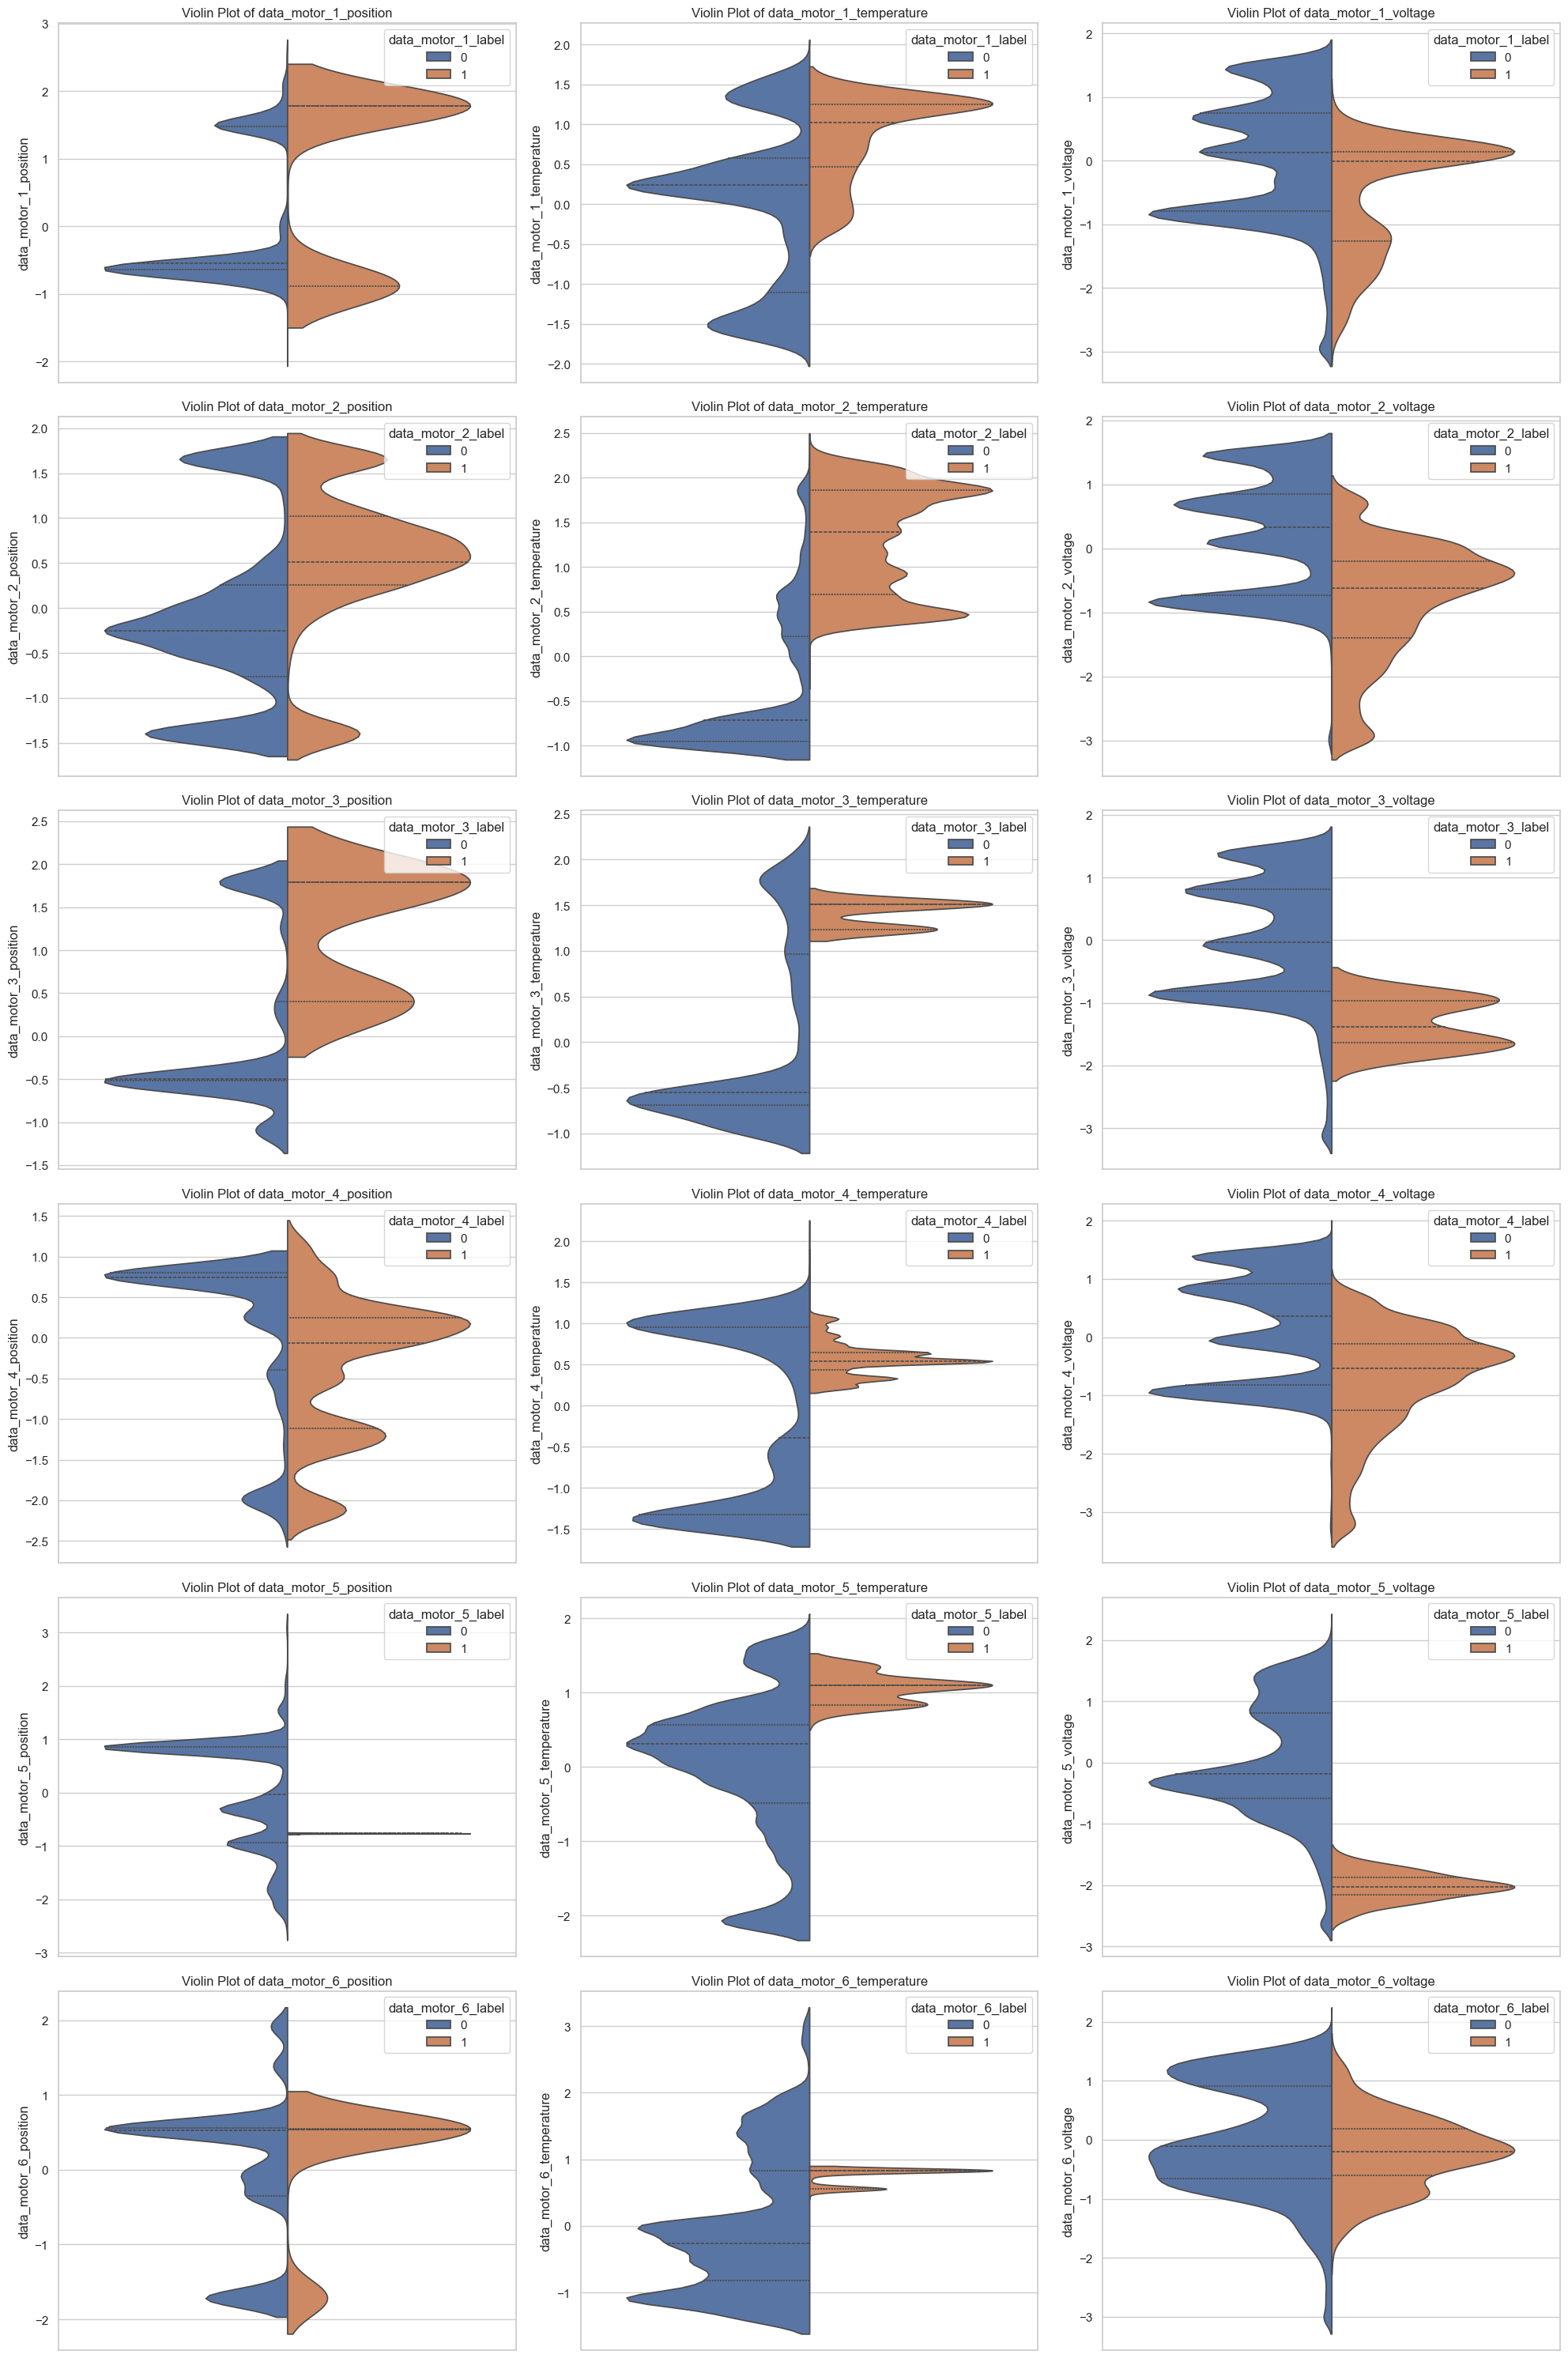

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

num_rows = 6

plt.figure(figsize=(20, num_rows * 5))  

for i in range(1, 7):
    position_feature = f"data_motor_{i}_position"
    temperature_feature = f"data_motor_{i}_temperature"
    voltage_feature = f"data_motor_{i}_voltage"
    label_feature = f"data_motor_{i}_label"

    plt.subplot(num_rows, 3, (i-1)*3 + 1)
    sns.violinplot(y=position_feature, data=df_smooth, inner='quartile', hue=label_feature, split=True)
    plt.title('Violin Plot of {}'.format(position_feature))
    plt.ylabel(position_feature)

    plt.subplot(num_rows, 3, (i-1)*3 + 2)
    sns.violinplot(y=temperature_feature, data=df_smooth, inner='quartile', hue=label_feature, split=True)
    plt.title('Violin Plot of {}'.format(temperature_feature))
    plt.ylabel(temperature_feature)

    plt.subplot(num_rows, 3, (i-1)*3 + 3)
    sns.violinplot(y=voltage_feature, data=df_smooth, inner='quartile', hue=label_feature, split= True)
    plt.title('Violin Plot of {}'.format(voltage_feature))
    plt.ylabel(voltage_feature)

plt.tight_layout()
plt.show()


## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

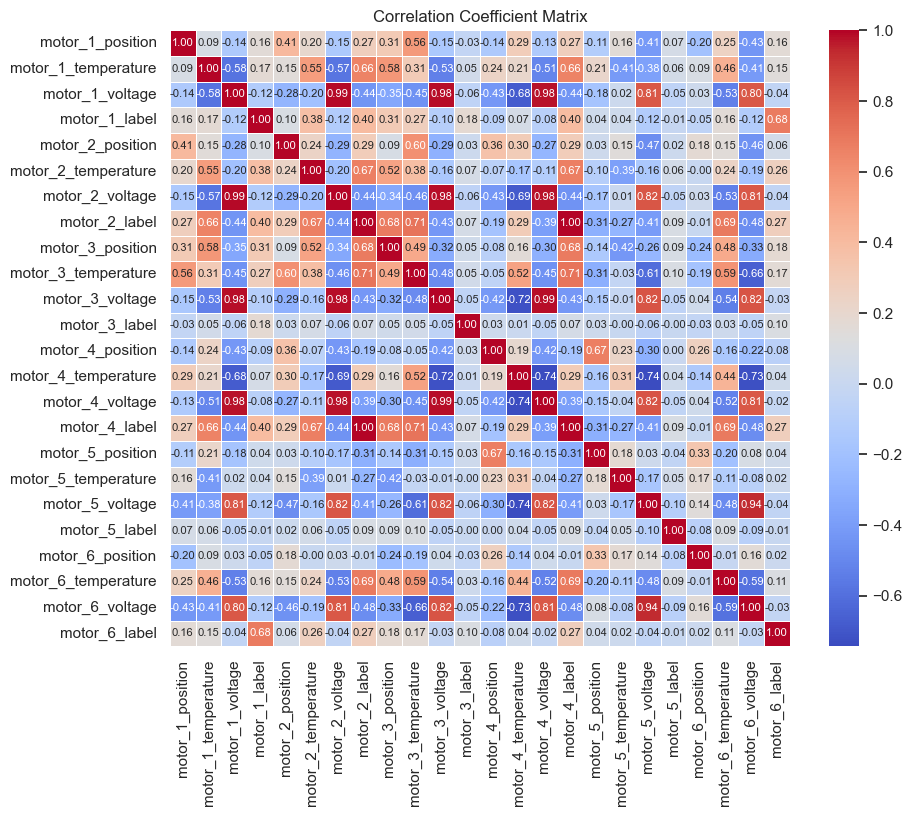

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

col_to_plot = [col for col in df.columns if ('time' not in col and 'test' not in col)]

df_matrix = df_smooth.loc[:, col_to_plot]

correlation_matrix = df_matrix.corr()

correlation_matrix.columns = [col[5:] for col in correlation_matrix.columns]
correlation_matrix.index = [index[5:] for index in correlation_matrix.index]

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

plt.title('Correlation Coefficient Matrix')
plt.show()


### Remark about the data

In [15]:

label_percentages = pd.DataFrame(index=range(1, 2))  

for i in range(1, 7):
    values = df_smooth[f"data_motor_{i}_label"].value_counts(normalize=True) * 100    
    label_percentages[f"Motor_{i}_Label_0_%"] = values.get(0, 0)  
    label_percentages[f"Motor_{i}_Label_1_%"] = values.get(1, 0)  

print(label_percentages)


   Motor_1_Label_0_%  Motor_1_Label_1_%  Motor_2_Label_0_%  Motor_2_Label_1_%  \
1          95.850329           4.149671          78.634977          21.365023   

   Motor_3_Label_0_%  Motor_3_Label_1_%  Motor_4_Label_0_%  Motor_4_Label_1_%  \
1           99.85868            0.14132          78.634977          21.365023   

   Motor_5_Label_0_%  Motor_5_Label_1_%  Motor_6_Label_0_%  Motor_6_Label_1_%  
1          99.775173           0.224827          98.011884           1.988116  


We can see that for motors 3, 5 and 6, the percentage of labeled 1 inputs is much less than labeled 0. We should keep that in mind when training  our model.

## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?




After all the data preprocessing, we notice that some features are redundants, because they are highly correlated to other features. As a matter of fact, we can delete the motor 2/3/4 voltage because they have a correlation of nearly one with motor 1 voltage. 

On the other hand, features like motor 5 temperature are not correlated with any other features, except labels which means this is one of the most relevant feature. 

The violin plots showed us that on average a dysfunction in a motor has a higher temperature. 

However, we have to be careful and keep lots of features because for example motor 5 label is nearly not correlated to every features so it will be difficult to predict. Thus, we have to keep a lot of (relevant) features to increase the accuracy.